#Paquetes necesarios


In [ ]:
!pip install powerlaw
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import gaussian_kde
import powerlaw

# Drive down- and uploading (Dirección a la carpeta en Drive)



In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# Poner Proyecto Sociofísica con acceso directo en Mi Unidad

directory_in = '/gdrive/MyDrive/Proyecto Sociofísica/Data/'
directory_out = '/gdrive/MyDrive/Proyecto Sociofísica/Results/'

# Grafo dirigido completo

['mi145tp-D', 'ARG81', '25aics', 'BAS1', 'atp', 'allphn', 'DAL82', '2ippm', 'LEU3', 'L2aadp6sa', 'LYS14', 'amet', 'MET31', 'met-L[e]', 'MET32', 'MET4', 'dhor-S', 'PPR1', 'orot', 'utp', 'gln-L[e]', 'RTG1', 'RTG3', 'sterols[icp]', 'ECM22', 'UPC2', 'MIG1', 'CAT8', 'MIG2', 'GAT1', 'DAL80', 'GLN3', 'GZF3', 'GAL4', 'HAP4', 'RGT1', 'MTH1', 'ADR1', 'PIP2', 'HAP1', 'ROX1', 'SIP4', 'glc[e]', 'arg-L[e]', 'phe-L[e]', 'ARO80', 'trp-L[e]', 'tyr-L[e]', 'ser-L[e]', 'CHA4', 'thr-L[e]', '4abut[e]', 'DAL81', 'alltn[e]', 'gal[e]', 'amino_acids[ep]', 'GCN4', 'nh4[e]', 'purines[ep]', 'good_nitrogen_source[ep]', 'o2[e]', 'HAP2', 'chol[e]', 'INO2', 'inost[e]', 'INO4', 'IXR1', 'leu-L[e]', 'lys-L[e]', 'MAL13', 'malt[e]', 'MAL33', 'MOT3', 'NRG1', 'OAF1', 'ocdcea[e]', 'pi[e]', 'PHO2', 'PHO4', 'pro-L[e]', 'PUT3', 'thm[e]', 'THI2', 'UGA3', 'pyrimidines[ep]', 'poor_nitrogen_source[ep]', 'STP1', 'STP2', 'IMD2', 'gdp', 'URA2', 'YGL186C', 'pydxn', 'ZWF1', 'ERG1', 'sterols[ip]', 'ERG10', 'ERG13', 'ERG25', 'ERG9', 'AAC3'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


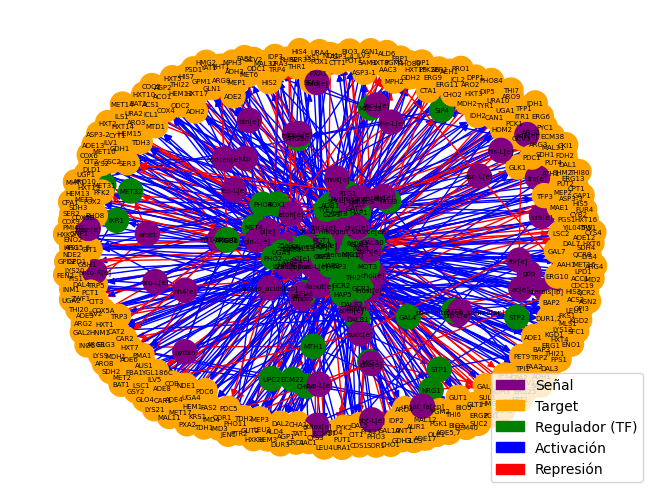

In [ ]:
# Cargar los dos primeros cuadernos del archivo .xls (modifica la ruta si es necesario)
file_path = directory_in + 'iMH805_775_regnetwork.xls'
sheet1 = pd.read_excel(file_path, sheet_name=0)
sheet2 = pd.read_excel(file_path, sheet_name=1)

# Seleccionar las primeras 4 columnas de ambos cuadernos con los nombres correctos
columns_sheet1 = ['Target TF', 'Regulator TF', 'Regulator signal', 'Act/Rep']
columns_sheet2 = ['Target', 'Regulator TF', 'Regulator signal', 'Act/Rep']

df1 = sheet1[columns_sheet1]
df2 = sheet2[columns_sheet2]

# Renombrar las columnas del segundo cuaderno para que coincidan con las del primero
df2 = df2.rename(columns={'Target': 'Target TF'})

# Combinar los dos cuadernos en un solo DataFrame
df_filtered = pd.concat([df1, df2], ignore_index=True)

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir los nodos y las aristas basadas en el DataFrame
for index, row in df_filtered.iterrows():
    regulator = row['Regulator TF']
    target = row['Target TF']
    signal = row['Regulator signal']
    act_rep = row['Act/Rep']

    # Añadir los nodos y clasificarlos según su tipo
    if pd.notna(target) and target not in df_filtered['Regulator TF'].values:
        G.add_node(target, node_type='target', color='orange')
    if pd.notna(regulator):
        G.add_node(regulator, node_type='TF', color='green')
    if pd.notna(signal):
        G.add_node(signal, node_type='signal', color='purple')

    # Verificar si los valores no son NA antes de añadir la arista
    if pd.notna(regulator) and pd.notna(target) and pd.notna(act_rep):
        # Añadir la arista, etiquetando con el tipo de interacción (Activación o Represión)
        if act_rep == 'A':
            G.add_edge(regulator, target, color='blue', interaction='Activación')
        elif act_rep == 'R':
            G.add_edge(regulator, target, color='red', interaction='Represión')

    if pd.notna(signal) and pd.notna(act_rep):
        # Añadir la arista, etiquetando con el tipo de interacción (Activación o Represión)
        if act_rep == 'A':
            G.add_edge(signal, target, color='blue', interaction='Activación')
        elif act_rep == 'R':
            G.add_edge(signal, target, color='red', interaction='Represión')


# Asignar color a los nodos activos (A) y reprimidos (R)
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Dibujar el grafo
(G.nodes)
print(G.nodes)
pos = nx.spring_layout(G)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=colors, node_size=300, font_size=5)

# Crear las leyendas
signal_patch = mpatches.Patch(color='purple', label='Señal')
target_patch = mpatches.Patch(color='orange', label='Target')
tf_patch = mpatches.Patch(color='green', label='Regulador (TF)')
blue_edge_patch = mpatches.Patch(color='blue', label='Activación')
orange_edge_patch = mpatches.Patch(color='red', label='Represión')

plt.legend(handles=[signal_patch, target_patch, tf_patch, blue_edge_patch, orange_edge_patch])
plt.show()

In [ ]:
2*G.number_of_edges()/G.number_of_nodes()

3.3934065934065933

In [ ]:
C_1 = nx.is_strongly_connected(G)
C_2 = nx.is_weakly_connected(G)

{node: 1 / (coeff+0.0001) for node, coeff in nx.clustering(G).items()}

{'mi145tp-D': 10000.0,
 'ARG81': 10000.0,
 '25aics': 10000.0,
 'BAS1': 10000.0,
 'atp': 10000.0,
 'allphn': 10000.0,
 'DAL82': 10000.0,
 '2ippm': 10000.0,
 'LEU3': 10000.0,
 'L2aadp6sa': 10000.0,
 'LYS14': 10000.0,
 'amet': 10000.0,
 'MET31': 10000.0,
 'met-L[e]': 10000.0,
 'MET32': 10000.0,
 'MET4': 10000.0,
 'dhor-S': 10000.0,
 'PPR1': 10000.0,
 'orot': 10000.0,
 'utp': 10000.0,
 'gln-L[e]': 10000.0,
 'RTG1': 10000.0,
 'RTG3': 10000.0,
 'sterols[icp]': 10000.0,
 'ECM22': 10000.0,
 'UPC2': 10000.0,
 'MIG1': 83.30027766759224,
 'CAT8': 38.70673952641166,
 'MIG2': 29.910269192422728,
 'GAT1': 14.063527199194468,
 'DAL80': 10.987913295375087,
 'GLN3': 50.03411416875142,
 'GZF3': 2.4993751562109474,
 'GAL4': 35.87086488640893,
 'HAP4': 330.69038870624644,
 'RGT1': 10000.0,
 'MTH1': 11.985617259288853,
 'ADR1': 45.29391269722761,
 'PIP2': 52.225814474011436,
 'HAP1': 35.87086488640893,
 'ROX1': 35.87086488640893,
 'SIP4': 6.662225183211193,
 'glc[e]': 10000.0,
 'arg-L[e]': 10000.0,
 'phe-L

#Centralidades y distribución de sus medidas no dirigida
En el siguiente código determinamos las medidas de centralidad para cada nodo, tal que al final lo que queremos obtener es un "Ranking" conformado por el promedio de estas medidas también promediado con el grado total (de salida y entrada) de cada elemento, para al final filtrar cierta cantidad (al menos 10) que permita identificar los agentes con más relevancia dentro de la red. Así mismo por ver el comportamiento de la frecuencia en función de los valores de centralidad se determinaron las gráficas asociadas a cada tipo de centralidad, dando idea de este comportamiento.

In [ ]:
print(G.edges())
G.reverse()
print(G.reverse().edges())

[('mi145tp-D', 'ARG81'), ('ARG81', 'ARG1'), ('ARG81', 'ARG3'), ('ARG81', 'ARG5,6'), ('ARG81', 'ARG8'), ('ARG81', 'CAR1'), ('ARG81', 'CAR2'), ('ARG81', 'CPA1'), ('25aics', 'BAS1'), ('BAS1', 'ADE1'), ('BAS1', 'ADE12'), ('BAS1', 'ADE13'), ('BAS1', 'ADE17'), ('BAS1', 'ADE2'), ('BAS1', 'ADE3'), ('BAS1', 'ADE4'), ('BAS1', 'ADE5,7'), ('BAS1', 'ADE6'), ('BAS1', 'ADE8'), ('BAS1', 'GLN1'), ('BAS1', 'HIS1'), ('BAS1', 'HIS4'), ('BAS1', 'HIS7'), ('BAS1', 'MTD1'), ('BAS1', 'SHM2'), ('BAS1', 'URA1'), ('BAS1', 'URA3'), ('atp', 'BAS1'), ('allphn', 'DAL82'), ('DAL82', 'CAR2'), ('DAL82', 'DAL1'), ('DAL82', 'DAL2'), ('DAL82', 'DAL4'), ('DAL82', 'DAL7'), ('DAL82', 'DUR1,2'), ('DAL82', 'DUR3'), ('2ippm', 'LEU3'), ('LEU3', 'BAP2'), ('LEU3', 'BAT1'), ('LEU3', 'GDH1'), ('LEU3', 'GDH2'), ('LEU3', 'ILV2'), ('LEU3', 'ILV5'), ('LEU3', 'LEU1'), ('LEU3', 'LEU2'), ('LEU3', 'LEU4'), ('L2aadp6sa', 'LYS14'), ('LYS14', 'LYS1'), ('LYS14', 'LYS12'), ('LYS14', 'LYS2'), ('LYS14', 'LYS20'), ('LYS14', 'LYS21'), ('LYS14', 'LYS4


Top 5 Nodos por Promedio de Centralidades y Grado Total:
        Promedio Centralidades  Grado Total    Ranking
glc[e]               24.755104           66  45.377552
GCN4                 22.507674           60  41.253837
GLN3                 12.381700           33  22.690850
HAP2                  9.005892           24  16.502946
PHO2                  8.255972           22  15.127986
{'mi145tp-D': 1, 'ARG81': 9, '25aics': 1, 'BAS1': 21, 'atp': 1, 'allphn': 1, 'DAL82': 9, '2ippm': 1, 'LEU3': 11, 'L2aadp6sa': 1, 'LYS14': 9, 'amet': 4, 'MET31': 5, 'met-L[e]': 12, 'MET32': 5, 'MET4': 10, 'dhor-S': 1, 'PPR1': 8, 'orot': 1, 'utp': 2, 'gln-L[e]': 3, 'RTG1': 7, 'RTG3': 6, 'sterols[icp]': 3, 'ECM22': 3, 'UPC2': 5, 'MIG1': 21, 'CAT8': 17, 'MIG2': 6, 'GAT1': 19, 'DAL80': 21, 'GLN3': 33, 'GZF3': 7, 'GAL4': 9, 'HAP4': 19, 'RGT1': 6, 'MTH1': 4, 'ADR1': 14, 'PIP2': 15, 'HAP1': 9, 'ROX1': 9, 'SIP4': 5, 'glc[e]': 66, 'arg-L[e]': 2, 'phe-L[e]': 2, 'ARO80': 5, 'trp-L[e]': 1, 'tyr-L[e]': 1, 'ser-L[e]': 4

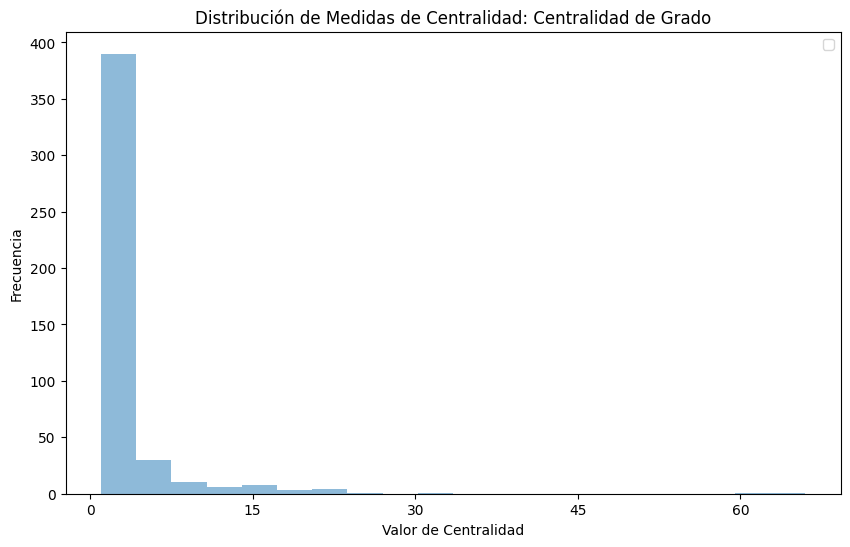

{'mi145tp-D': 0.0, 'ARG81': 6.807285740681313e-05, '25aics': 0.0, 'BAS1': 0.00023825500092384595, 'atp': 0.0, 'allphn': 0.0, 'DAL82': 6.807285740681313e-05, '2ippm': 0.0, 'LEU3': 8.752224523733115e-05, 'L2aadp6sa': 0.0, 'LYS14': 6.807285740681313e-05, 'amet': 0.0, 'MET31': 9.724693915259018e-06, 'met-L[e]': 0.0, 'MET32': 9.724693915259018e-06, 'MET4': 5.83481634915541e-05, 'dhor-S': 0.0, 'PPR1': 7.779755132207214e-05, 'orot': 0.0, 'utp': 0.0, 'gln-L[e]': 0.0, 'RTG1': 1.7018214351703283e-05, 'RTG3': 1.2155867394073772e-05, 'sterols[icp]': 0.0, 'ECM22': 4.862346957629509e-06, 'UPC2': 2.188056130933279e-05, 'MIG1': 0.00013209375901560166, 'CAT8': 0.0006077933697036886, 'MIG2': 0.0003355019400764361, 'GAT1': 0.00013128336785599675, 'DAL80': 0.00011912750046192297, 'GLN3': 0.00027229142962725253, 'GZF3': 9.724693915259018e-06, 'GAL4': 7.779755132207214e-05, 'HAP4': 0.00046192296097480334, 'RGT1': 0.0002090809191780689, 'MTH1': 3.4036428703406566e-05, 'ADR1': 5.105464305510984e-05, 'PIP2': 7

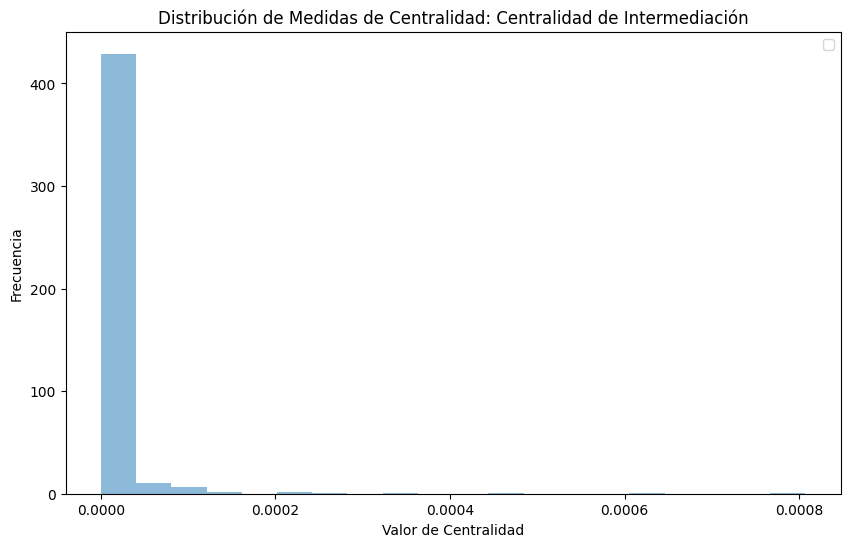

{'mi145tp-D': 0.0, 'ARG81': 0.004405286343612335, '25aics': 0.0, 'BAS1': 0.006607929515418502, 'atp': 0.0, 'allphn': 0.0, 'DAL82': 0.004405286343612335, '2ippm': 0.0, 'LEU3': 0.004405286343612335, 'L2aadp6sa': 0.0, 'LYS14': 0.004405286343612335, 'amet': 0.0, 'MET31': 0.004405286343612335, 'met-L[e]': 0.0, 'MET32': 0.004405286343612335, 'MET4': 0.004405286343612335, 'dhor-S': 0.0, 'PPR1': 0.00881057268722467, 'orot': 0.0, 'utp': 0.0, 'gln-L[e]': 0.0, 'RTG1': 0.0022026431718061676, 'RTG3': 0.0022026431718061676, 'sterols[icp]': 0.0, 'ECM22': 0.0022026431718061676, 'UPC2': 0.004405286343612335, 'MIG1': 0.0022026431718061676, 'CAT8': 0.006118453255017133, 'MIG2': 0.0035242290748898684, 'GAT1': 0.006883259911894274, 'DAL80': 0.007866582756450599, 'GLN3': 0.004405286343612335, 'GZF3': 0.006883259911894274, 'GAL4': 0.004955947136563877, 'HAP4': 0.006099627245001695, 'RGT1': 0.003303964757709251, 'MTH1': 0.0029368575624082235, 'ADR1': 0.0022026431718061676, 'PIP2': 0.004955947136563877, 'HAP1'

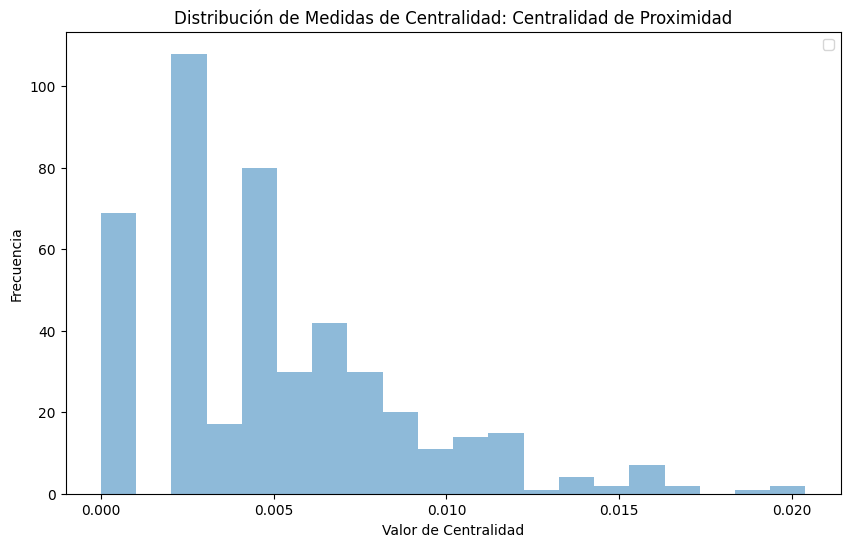

{'mi145tp-D': 0.03909685341175028, 'ARG81': 0.04691622409410034, '25aics': 0.03909685341175028, 'BAS1': 0.05082590943527537, 'atp': 0.03909685341175028, 'allphn': 0.03909685341175028, 'DAL82': 0.04691622409410034, '2ippm': 0.03909685341175028, 'LEU3': 0.04691622409410034, 'L2aadp6sa': 0.03909685341175028, 'LYS14': 0.04691622409410034, 'amet': 0.03909685341175028, 'MET31': 0.04691622409410034, 'met-L[e]': 0.03909685341175028, 'MET32': 0.04691622409410034, 'MET4': 0.04691622409410034, 'dhor-S': 0.03909685341175028, 'PPR1': 0.05473559477645039, 'orot': 0.03909685341175028, 'utp': 0.03909685341175028, 'gln-L[e]': 0.03909685341175028, 'RTG1': 0.04300653875292531, 'RTG3': 0.04300653875292531, 'sterols[icp]': 0.03909685341175028, 'ECM22': 0.04300653875292531, 'UPC2': 0.04691622409410034, 'MIG1': 0.04300653875292531, 'CAT8': 0.04774155866962238, 'MIG2': 0.04344051382579574, 'GAT1': 0.05332182518928411, 'DAL80': 0.05403267635864588, 'GLN3': 0.04691622409410034, 'GZF3': 0.04912062979938573, 'GAL

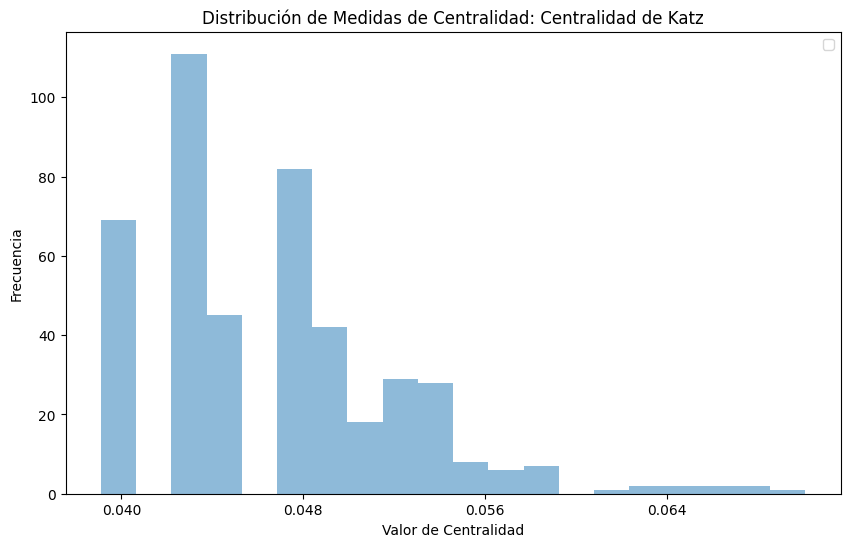

{'mi145tp-D': 0.0017355682089351743, 'ARG81': 0.0039481954439455425, '25aics': 0.0017355682089351743, 'BAS1': 0.005423280267285787, 'atp': 0.0017355682089351743, 'allphn': 0.0017355682089351743, 'DAL82': 0.004685737855615665, '2ippm': 0.0017355682089351743, 'LEU3': 0.0039481954439455425, 'L2aadp6sa': 0.0017355682089351743, 'LYS14': 0.004685737855615665, 'amet': 0.0017355682089351743, 'MET31': 0.0022272631500485896, 'met-L[e]': 0.0017355682089351743, 'MET32': 0.0022272631500485896, 'MET4': 0.0022272631500485896, 'dhor-S': 0.0017355682089351743, 'PPR1': 0.006898365090626033, 'orot': 0.0017355682089351743, 'utp': 0.0017355682089351743, 'gln-L[e]': 0.0017355682089351743, 'RTG1': 0.0022272631500485896, 'RTG3': 0.0022272631500485896, 'sterols[icp]': 0.0017355682089351743, 'ECM22': 0.0022272631500485896, 'UPC2': 0.0023140328455391926, 'MIG1': 0.0017579179789857843, 'CAT8': 0.0021702912509122037, 'MIG2': 0.002117774361742393, 'GAT1': 0.0024135821785081055, 'DAL80': 0.0022448801128589833, 'GLN3

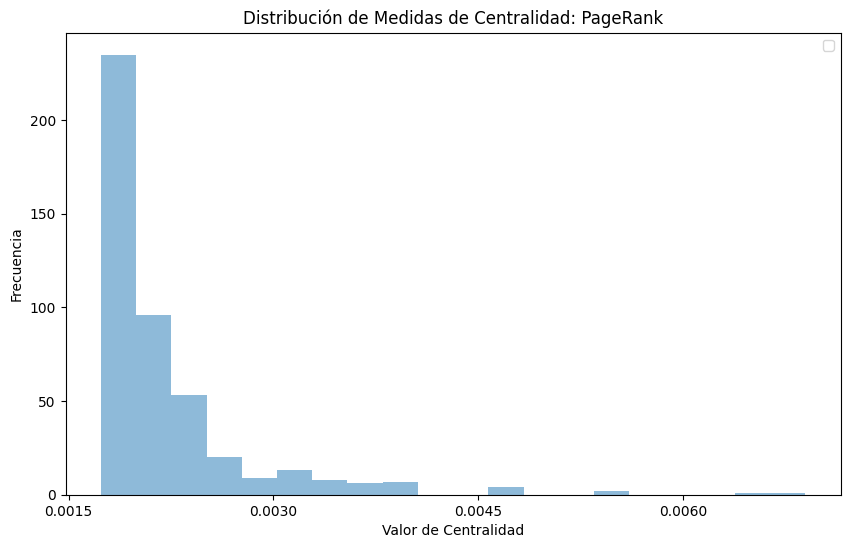

In [ ]:
# Calcular diferentes medidas de centralidad
centrality_measures = {
    'Centralidad de Grado': dict(G.degree()),
    'Centralidad de Intermediación': nx.betweenness_centrality(G),
    'Centralidad de Proximidad': nx.closeness_centrality(G),
    'Centralidad de Katz': nx.katz_centrality(G),
    'PageRank': nx.pagerank(G)
    #'clustering_coeffs' : nx.clustering(G)
    #'Clustering Coefficient': nx.clustering(G),
    #'1/Clustering Coefficient': 1/nx.clustering(G)
}

# Crear un DataFrame para las medidas de centralidad
centrality_df = pd.DataFrame(centrality_measures)

# Crear la tabla de grados (grado de entrada y grado de salida)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
degree_table = pd.DataFrame(list(in_degrees.items()), columns=['Nodo', 'Grado de entrada'])
degree_table['Grado de salida'] = degree_table['Nodo'].map(out_degrees)

# Calcular el grado total (suma del grado de entrada y salida)
degree_table['Grado Total'] = degree_table['Grado de entrada'] + degree_table['Grado de salida']

# Unir la tabla de grados con las medidas de centralidad
centrality_df = centrality_df.join(degree_table.set_index('Nodo'))

# Calcular el promedio de las centralidades para cada nodo
centrality_df['Promedio Centralidades'] = centrality_df.mean(axis=1)

# Ordenar los nodos por el promedio de centralidades y por el grado total
centrality_df['Ranking'] = centrality_df[['Promedio Centralidades', 'Grado Total']].mean(axis=1)
top_5_nodes = centrality_df.nlargest(5, 'Ranking')

# Obtener los nodos en el top 5
top_5_nodos = top_5_nodes.index.tolist()

print("\nTop 5 Nodos por Promedio de Centralidades y Grado Total:")
print(top_5_nodes[['Promedio Centralidades', 'Grado Total', 'Ranking']])
from matplotlib.ticker import MaxNLocator
for measure_name, measure in centrality_measures.items():
  print(measure)
  measure_values = measure.values()
  plt.figure(figsize=(10, 6))
  plt.hist(measure_values, bins=20, alpha=0.5)#, label=measure_name)
  plt.title(f'Distribución de Medidas de Centralidad: ' + measure_name)
  plt.xlabel('Valor de Centralidad')
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.gca().xaxis.set_major_locator(MaxNLocator(5))
  plt.show()

# Centralidades dirigidas

In [ ]:

# Create a directed graph with unreachable nodes
Gp = nx.DiGraph()
Gp.add_edges_from([(1, 2), (2, 3), (4, 5)])

# Node 1 cannot reach node 4 or 5, and node 4 cannot reach nodes 1, 2, or 3.
out_closeness = nx.closeness_centrality(Gp)
print(out_closeness)

{1: 0.0, 2: 0.25, 3: 0.3333333333333333, 4: 0.0, 5: 0.25}


In [ ]:
def print_top_bottom_nodes(df, centrality_name):
    print(f"\nMedida de Centralidad: {centrality_name}")

    # Ordenar por la centralidad
    df_sorted = df.sort_values(by=centrality_name, ascending=False)

    # Obtener los 10 nodos con valor más alto
    top_10 = df_sorted.head(10)
    print(f"\nTop 10 Nodos con mayor {centrality_name}:")
    print(top_10[[centrality_name, 'Tipo de Nodo']])

    # Obtener los 10 nodos con valor más bajo
    #bottom_10 = df_sorted.tail(10)
    #print(f"\nTop 10 Nodos con menor {centrality_name}:")
    #print(bottom_10[[centrality_name, 'Tipo de Nodo']])


Medida de Centralidad: Centralidad de Grado de Entrada

Top 10 Nodos con mayor Centralidad de Grado de Entrada:
      Centralidad de Grado de Entrada Tipo de Nodo
CIT1                                7       target
GCV3                                7       target
SUC2                                6       target
JEN1                                6       target
GDH1                                6       target
UGA4                                6       target
CYB2                                6       target
GLN1                                5       target
LPD1                                5       target
GCV2                                5       target

Medida de Centralidad: Centralidad de Grado de Salida

Top 10 Nodos con mayor Centralidad de Grado de Salida:
        Centralidad de Grado de Salida Tipo de Nodo
glc[e]                              66       signal
GCN4                                57           TF
GLN3                                31           TF
HAP2   

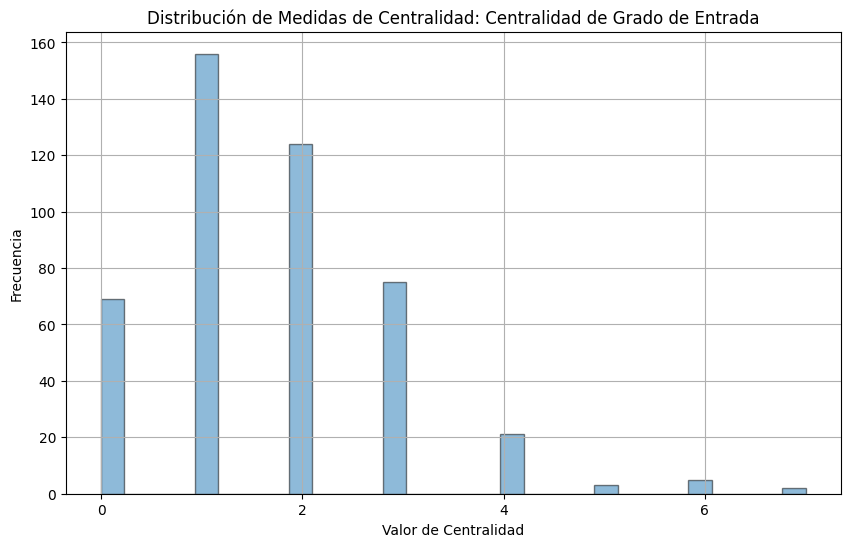

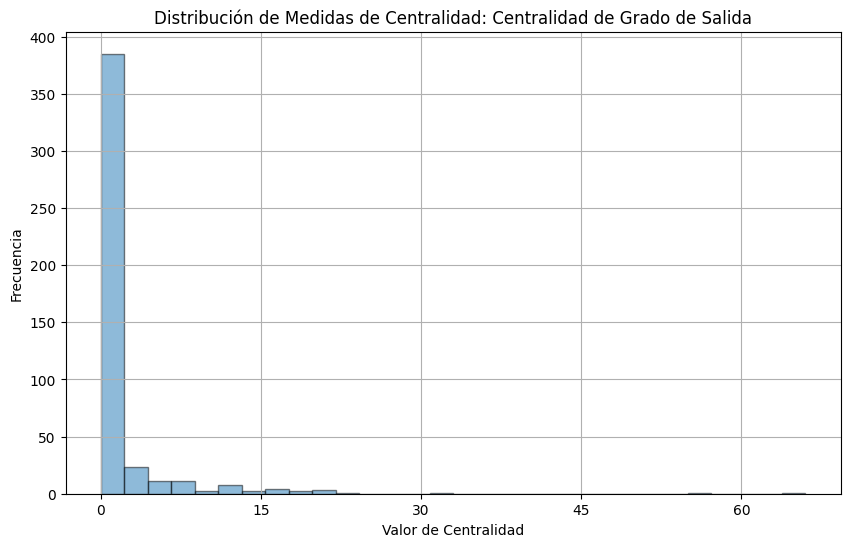

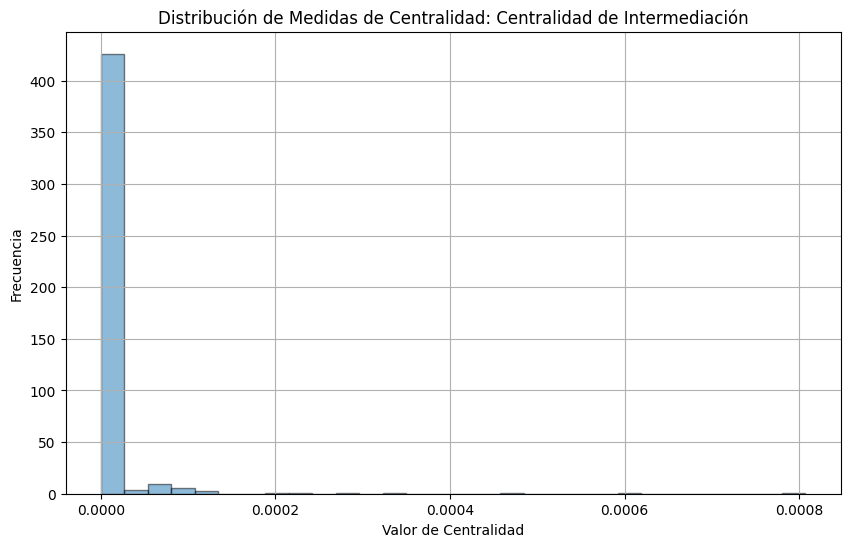

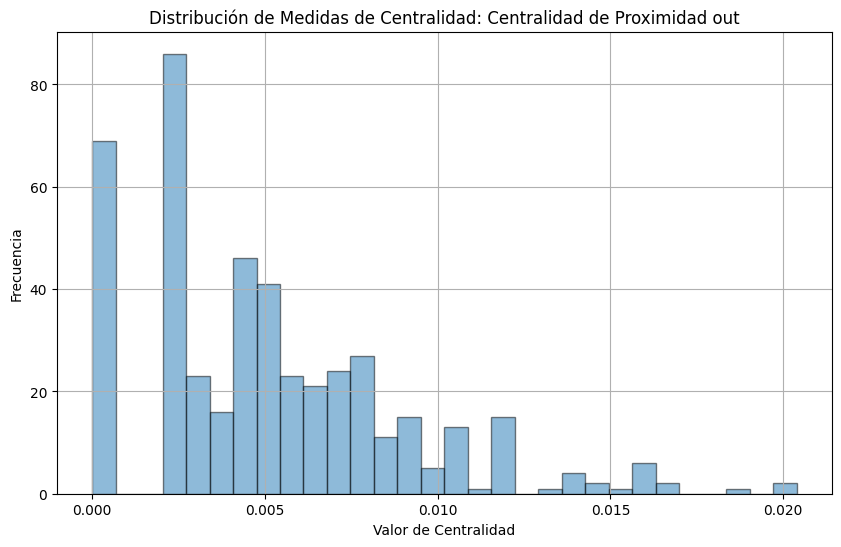

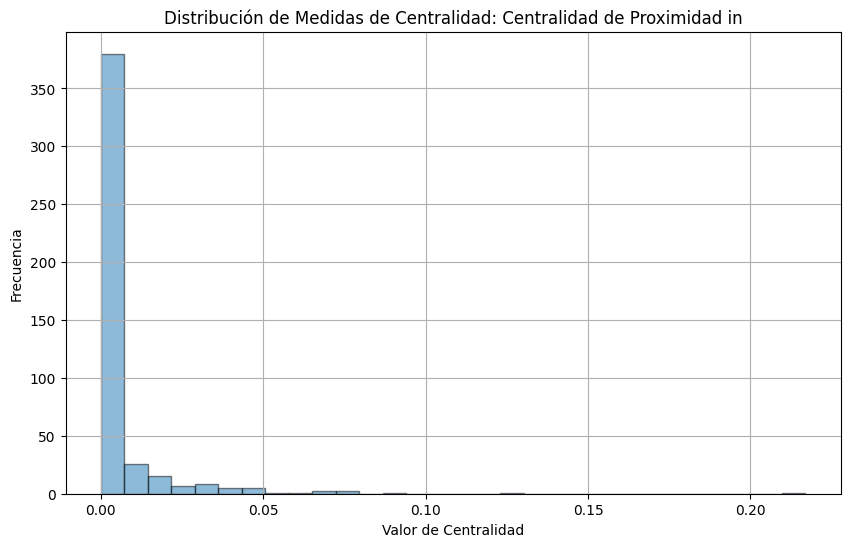

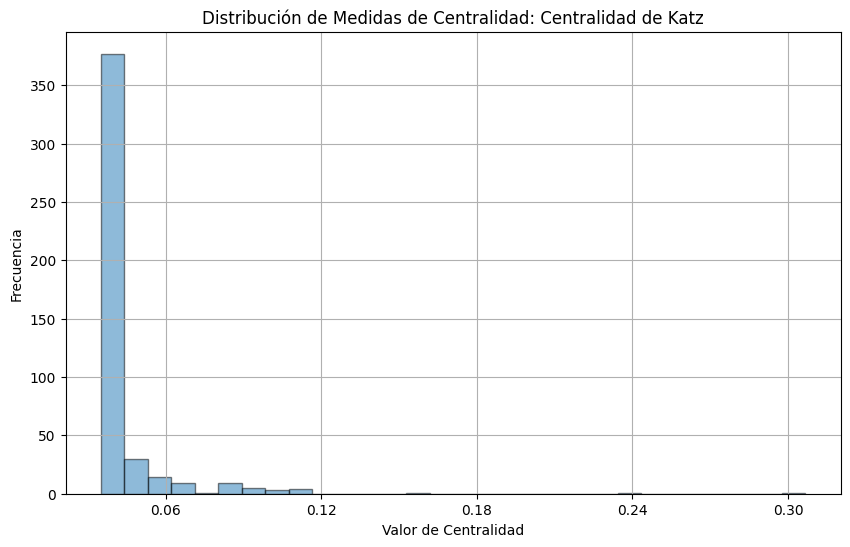

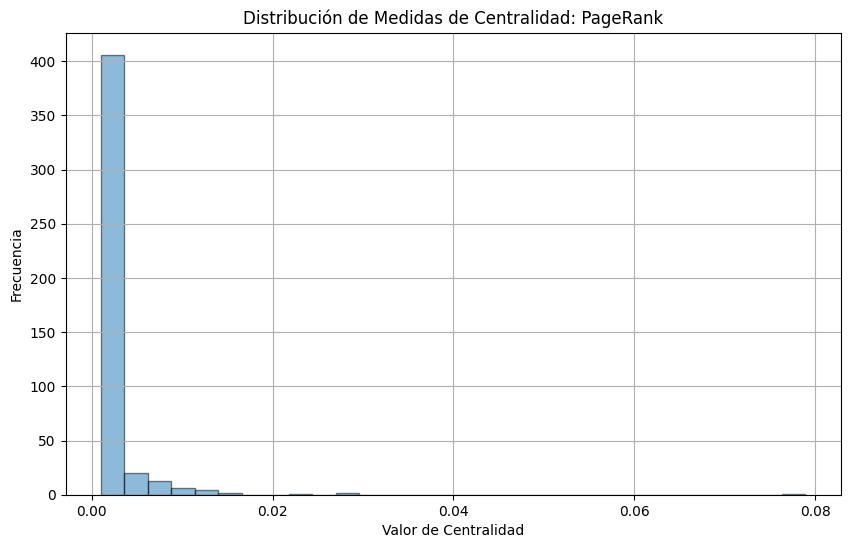

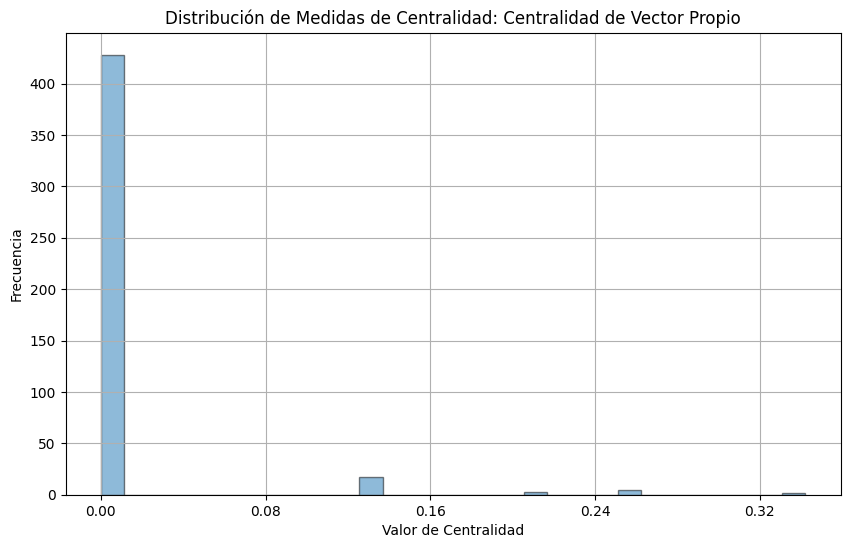

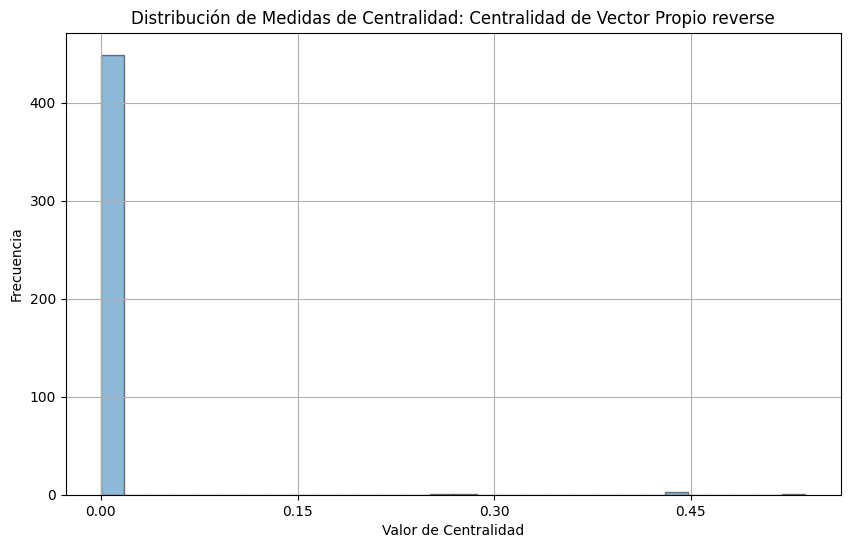

In [ ]:
# Calcular diferentes medidas de centralidad
centrality_measures = {
    'Centralidad de Grado de Entrada': dict(G.in_degree()),
    'Centralidad de Grado de Salida': dict(G.out_degree()),
    'Centralidad de Intermediación': nx.betweenness_centrality(G),
    'Centralidad de Proximidad out': nx.closeness_centrality(G),
    'Centralidad de Proximidad in': nx.closeness_centrality(G.reverse()),
    'Centralidad de Katz': nx.katz_centrality(G),
    'Centralidad de Katz': nx.katz_centrality(G.reverse()),
    'PageRank': nx.pagerank(G),
    'PageRank': nx.pagerank(G.reverse()),
    'Centralidad de Vector Propio': nx.eigenvector_centrality_numpy(G),
    'Centralidad de Vector Propio reverse': nx.eigenvector_centrality_numpy(G.reverse())
}

# Crear un DataFrame para las medidas de centralidad
centrality_df = pd.DataFrame(centrality_measures)

centrality_df_indiv = pd.DataFrame(centrality_measures)

# Suponiendo que 'node_type' es un atributo de los nodos en G
node_types = nx.get_node_attributes(G, 'node_type')

# Añadir el tipo de nodo al DataFrame
centrality_df_indiv['Tipo de Nodo'] = centrality_df_indiv.index.map(node_types)

# Imprimir los 10 nodos con valores más altos y más bajos para cada centralidad
for centrality_name in centrality_measures.keys():
    print_top_bottom_nodes(centrality_df_indiv, centrality_name)

# Crear la tabla de grados (grado de entrada y grado de salida)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
degree_table = pd.DataFrame(list(in_degrees.items()), columns=['Nodo', 'Grado de entrada'])
degree_table['Grado de salida'] = degree_table['Nodo'].map(out_degrees)

# Calcular el grado total (suma del grado de entrada y salida)
degree_table['Grado Total'] = degree_table['Grado de entrada'] + degree_table['Grado de salida']

# Unir la tabla de grados con las medidas de centralidad
centrality_df = centrality_df.join(degree_table.set_index('Nodo'))

# Calcular el promedio de las centralidades para cada nodo
centrality_df['Promedio Centralidades'] = centrality_df.mean(axis=1)

# Ordenar los nodos por el promedio de centralidades y por el grado total
centrality_df['Ranking'] = centrality_df[['Promedio Centralidades', 'Grado Total']].mean(axis=1)
top_5_nodes = centrality_df.nlargest(5, 'Ranking')

# Obtener los nodos en el top 5
top_5_nodos = top_5_nodes.index.tolist()

print("\nTop 5 Nodos por Promedio de Centralidades y Grado Total:")
print(top_5_nodes[['Promedio Centralidades', 'Grado Total', 'Ranking']])

# Graficar las distribuciones de las medidas de centralidad
from matplotlib.ticker import MaxNLocator
for measure_name, measure in centrality_measures.items():
    measure_values = measure.values()
    plt.figure(figsize=(10, 6))
    plt.hist(measure_values, bins=30, alpha=0.5, edgecolor='black')  # Histograma de los valores
    plt.title(f'Distribución de Medidas de Centralidad: {measure_name}')
    plt.xlabel('Valor de Centralidad')
    plt.ylabel('Frecuencia')
    plt.gca().xaxis.set_major_locator(MaxNLocator(5))
    plt.grid(True)
    plt.show()

## No tan útil

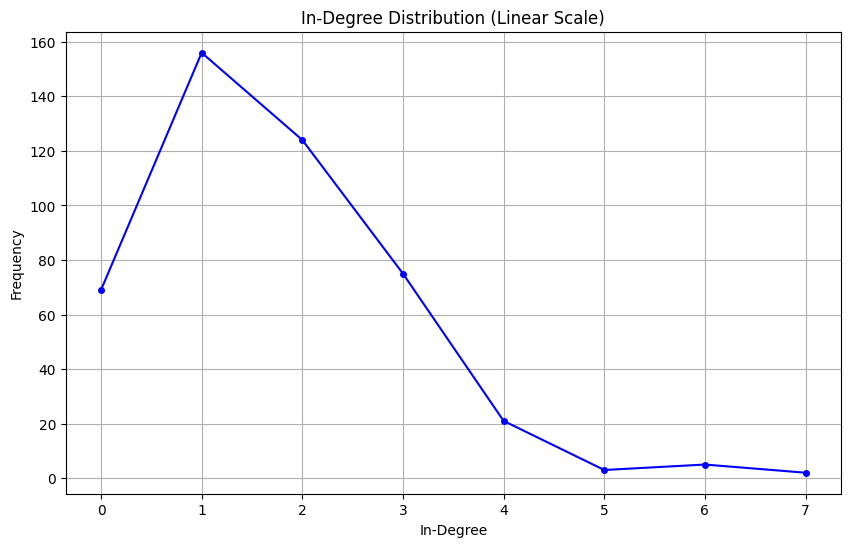

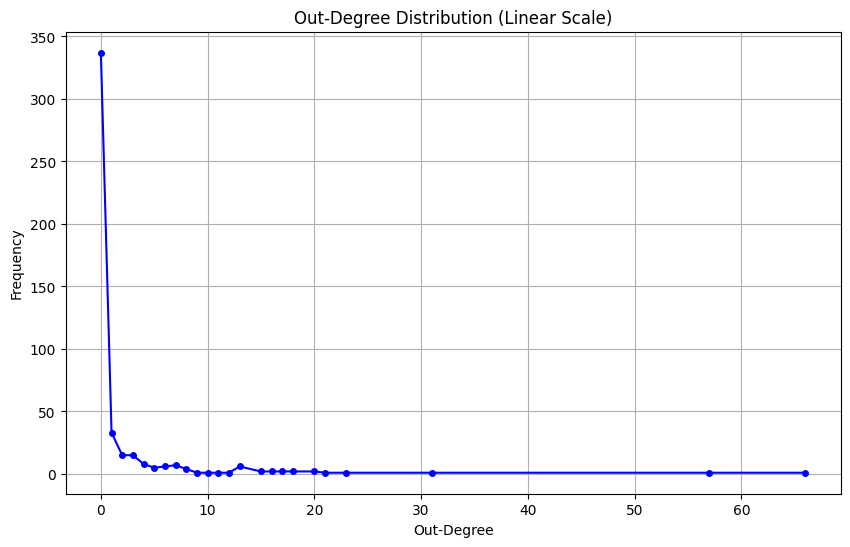

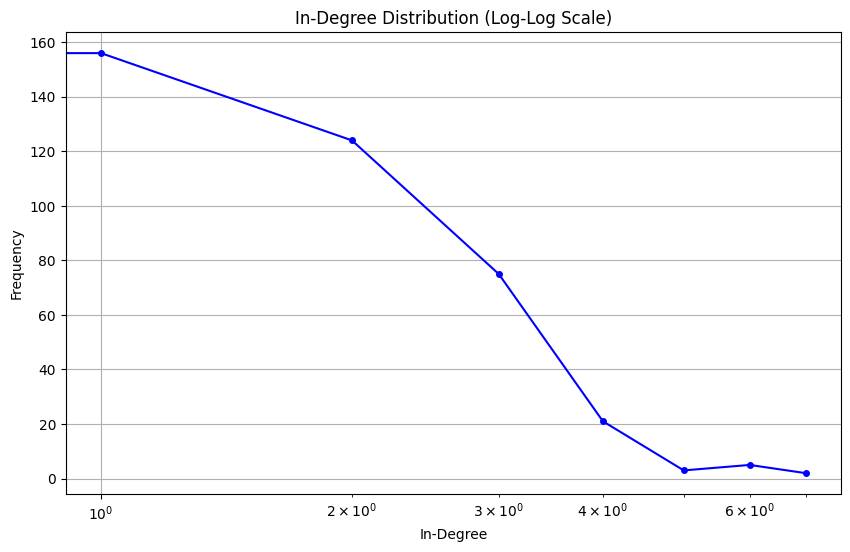

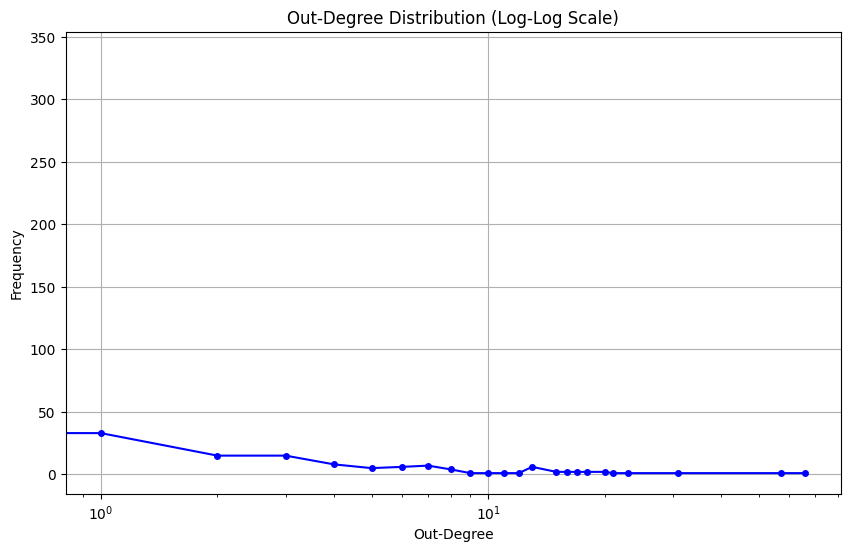

In [ ]:
## DISTRIBUTION OF DEGREE

# Get in-degree and out-degree distributions
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

# Function to plot degree distribution
def plot_degree_distribution(degrees, title, xlabel, ylabel, scale='linear'):
    unique_degrees, counts = np.unique(degrees, return_counts=True)

    plt.figure(figsize=(10, 6))
    plt.plot(unique_degrees, counts, 'bo-', markersize=4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if scale == 'log':
        plt.xscale('log')
        #plt.yscale('log')

    plt.grid(True)
    plt.show()

# Plot in-degree distribution (linear scale)
plot_degree_distribution(in_degrees, 'In-Degree Distribution (Linear Scale)', 'In-Degree', 'Frequency')

# Plot out-degree distribution (linear scale)
plot_degree_distribution(out_degrees, 'Out-Degree Distribution (Linear Scale)', 'Out-Degree', 'Frequency')

# Plot in-degree distribution (log-log scale)
plot_degree_distribution(in_degrees, 'In-Degree Distribution (Log-Log Scale)', 'In-Degree', 'Frequency', scale='log')

# Plot out-degree distribution (log-log scale)
plot_degree_distribution(out_degrees, 'Out-Degree Distribution (Log-Log Scale)', 'Out-Degree', 'Frequency', scale='log')


# Centralities on Barabasi Albert

In [ ]:
#import networkx as nx
#import numpy as np

def average_centrality_measurements_barabasi_albert(n, m, num_seeds=10, alpha=0.1):
    """
    Function to compute the average distribution of centrality measurements
    over multiple seeds of a Barabási-Albert graph.

    Parameters:
    - n: Number of nodes in the graph
    - m: Number of edges to attach from a new node to existing nodes
    - num_seeds: Number of random seeds to average over (default: 10)
    - alpha: Attenuation factor for Katz centrality (default: 0.1)

    Returns:
    - avg_centralities: Dictionary with average centrality measures
    """

    # Initialize accumulators for each centrality measure
    centralities_accum = {
        'degree_centrality': np.zeros(n),
        'betweenness_centrality': np.zeros(n),
        'closeness_centrality': np.zeros(n),
        'katz_centrality': np.zeros(n),
        'pagerank': np.zeros(n),
        'eigenvector_centrality': np.zeros(n),
        'clustering_coefficient': np.zeros(n)
    }

    for seed in range(num_seeds):
        # Generate a Barabási-Albert graph with the given seed
        G = nx.barabasi_albert_graph(n, m, seed=seed)

        # Compute centralities
        degree_centrality = np.array(list(nx.degree_centrality(G).values()))
        betweenness_centrality = np.array(list(nx.betweenness_centrality(G).values()))
        closeness_centrality = np.array(list(nx.closeness_centrality(G).values()))
        katz_centrality = np.array(list(nx.katz_centrality_numpy(G, alpha=alpha).values()))
        pagerank = np.array(list(nx.pagerank(G).values()))
        eigenvector_centrality = np.array(list(nx.eigenvector_centrality_numpy(G).values()))
        clustering_coefficient = np.array(list(nx.clustering(G).values()))

        # Accumulate centralities
        centralities_accum['degree_centrality'] += degree_centrality
        centralities_accum['betweenness_centrality'] += betweenness_centrality
        centralities_accum['closeness_centrality'] += closeness_centrality
        centralities_accum['katz_centrality'] += katz_centrality
        centralities_accum['pagerank'] += pagerank
        centralities_accum['eigenvector_centrality'] += eigenvector_centrality
        centralities_accum['clustering_coefficient'] += clustering_coefficient

    # Average the centralities
    avg_centralities = {key: value / num_seeds for key, value in centralities_accum.items()}

    return avg_centralities


In [ ]:
def plot_centrality_distributions(centralities):
    """
    Function to plot the centrality distributions as histograms.

    Parameters:
    - centralities: Dictionary containing average centrality measures
    """
    # Extract the labels and the corresponding data for centralities
    centrality_labels = list(centralities.keys())
    centrality_values = list(centralities.values())

    # Plot each centrality measure in a separate subplot as histograms
    fig, axs = plt.subplots(4, 2, figsize=(12, 16))
    axs = axs.flatten()

    for i, (label, values) in enumerate(zip(centrality_labels, centrality_values)):
        axs[i].hist(values, bins=50, edgecolor='black')
        axs[i].set_title(label.replace('_', ' ').capitalize())
        axs[i].set_xlabel(f'{label.replace("_", " ").capitalize()} value')  # X-axis label
        axs[i].set_ylabel('Frequency')  # Y-axis label
        axs[i].grid(True)

    # Remove the last empty subplot if necessary
    fig.delaxes(axs[-1])

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_centrality_distributions_with_scales(centralities, scales=['linear']):
    """
    Function to plot centrality distributions on different scales (e.g., log-log, semilog).

    Parameters:
    - centralities: Dictionary containing average centrality measures.
    - scales: List of scales to use for plotting (default is ['linear']).
              Options are: 'linear', 'log-log', 'semilog-x', 'semilog-y'.
    """

    centrality_labels = list(centralities.keys())
    centrality_values = list(centralities.values())

    for scale in scales:
        fig, axs = plt.subplots(4, 2, figsize=(12, 16))
        axs = axs.flatten()

        for i, (label, values) in enumerate(zip(centrality_labels, centrality_values)):
            axs[i].hist(values, bins=20, edgecolor='black')

            # Set title and labels
            axs[i].set_title(f'{label.replace("_", " ").capitalize()} ({scale} scale)')
            axs[i].set_xlabel(f'{label.replace("_", " ").capitalize()} value')
            axs[i].set_ylabel('Frequency')

            # Apply different scales to the axes
            if scale == 'log-log':
                axs[i].set_xscale('log')
                axs[i].set_yscale('log')
            elif scale == 'semilog-x':
                axs[i].set_xscale('log')
            elif scale == 'semilog-y':
                axs[i].set_yscale('log')

            axs[i].grid(True)

        # Remove the last empty subplot if necessary
        if len(centrality_labels) % 2 != 0:
            fig.delaxes(axs[-1])

        plt.tight_layout()
        plt.show()

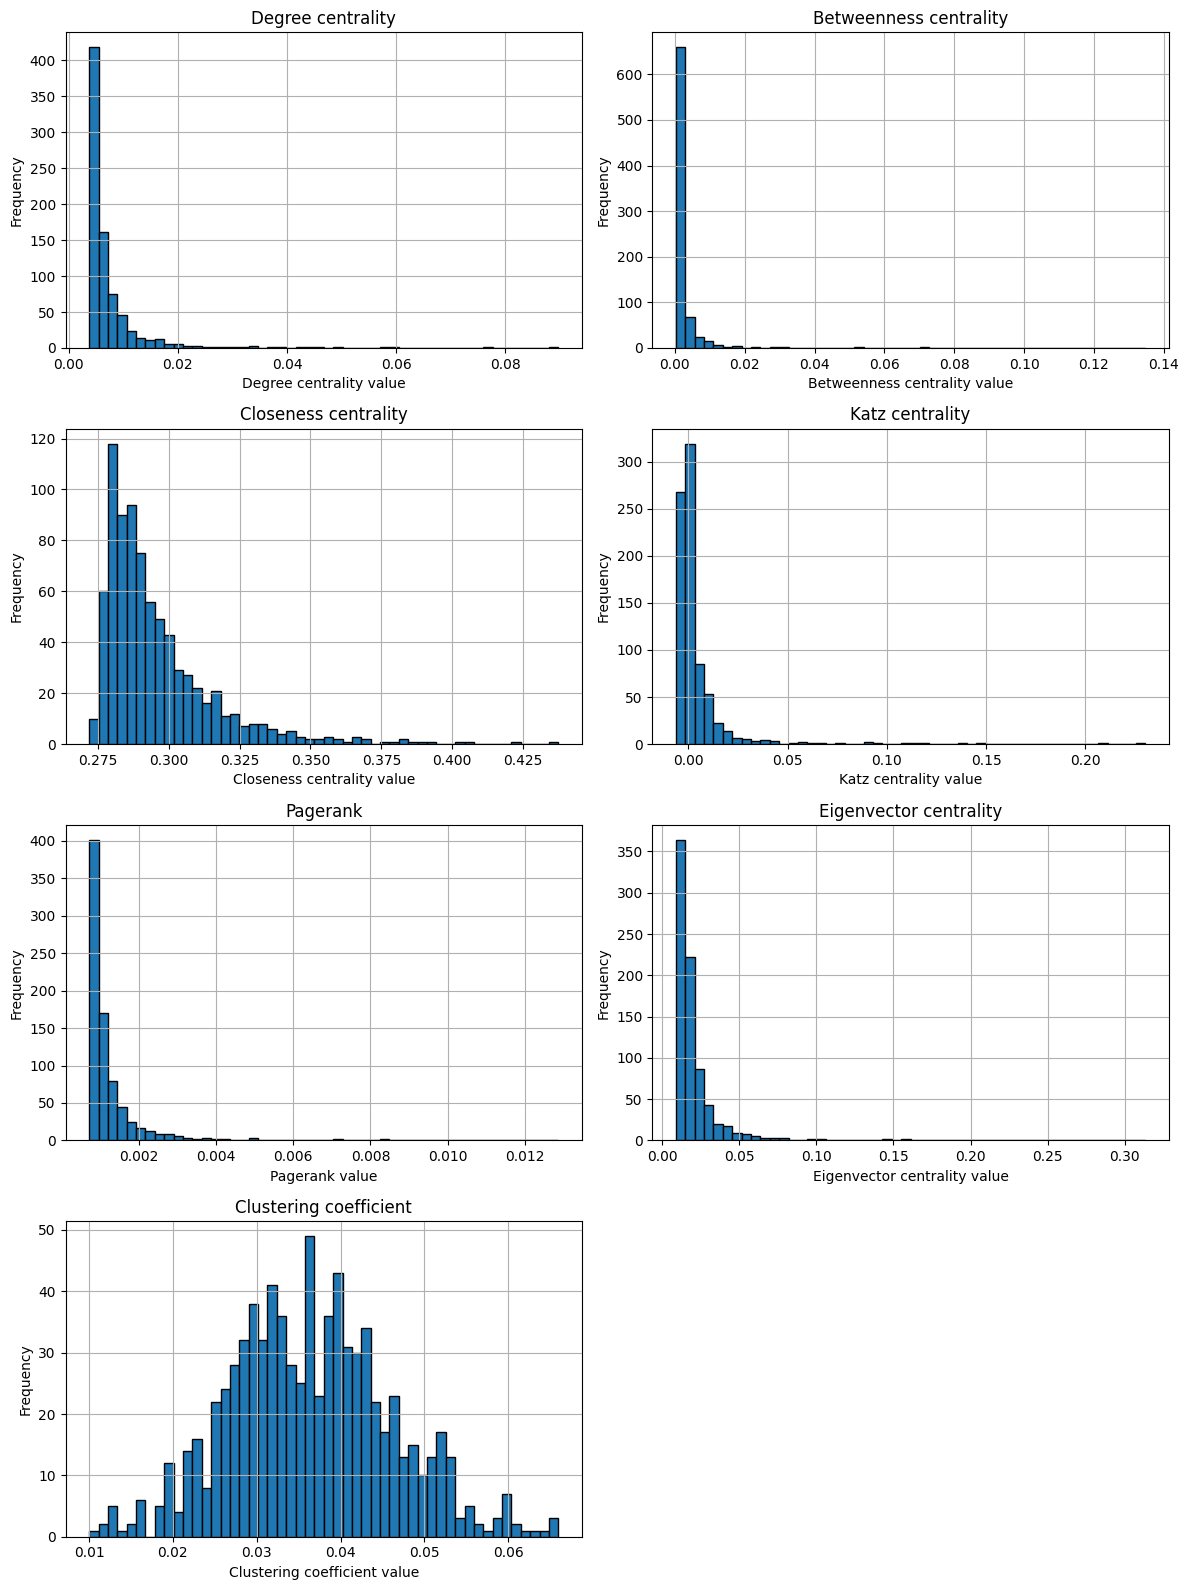

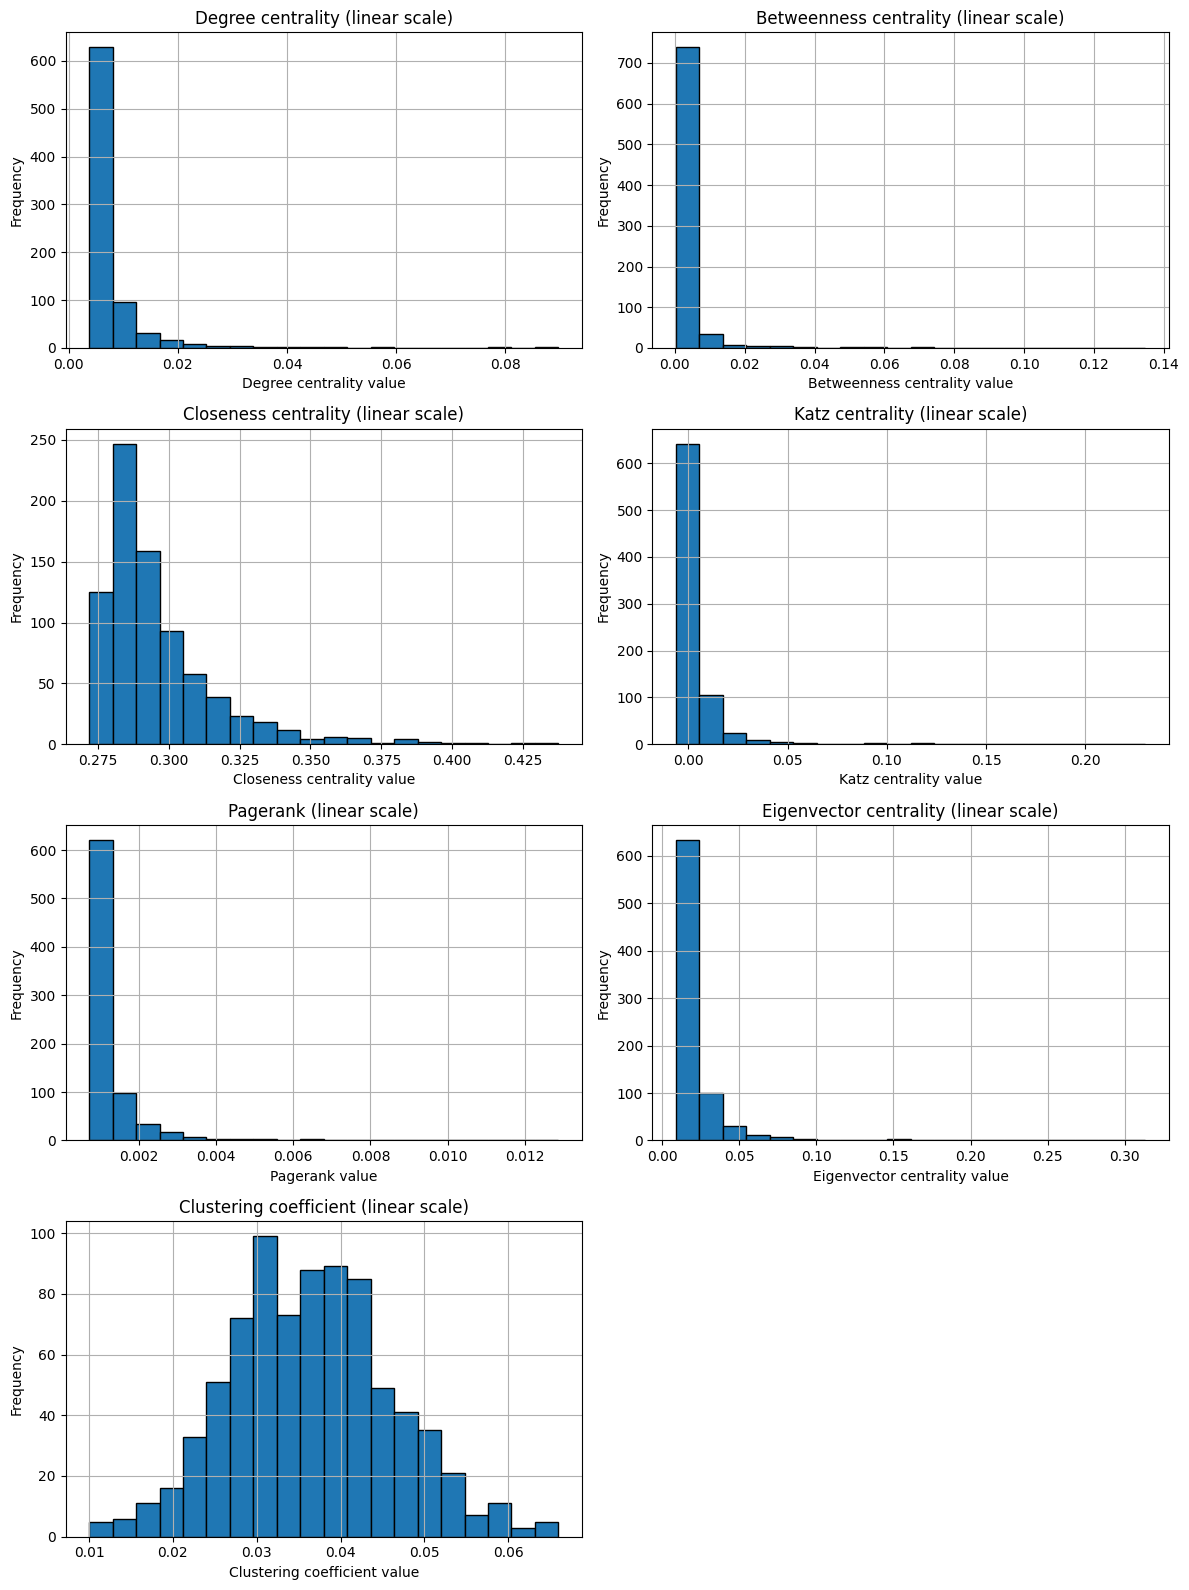

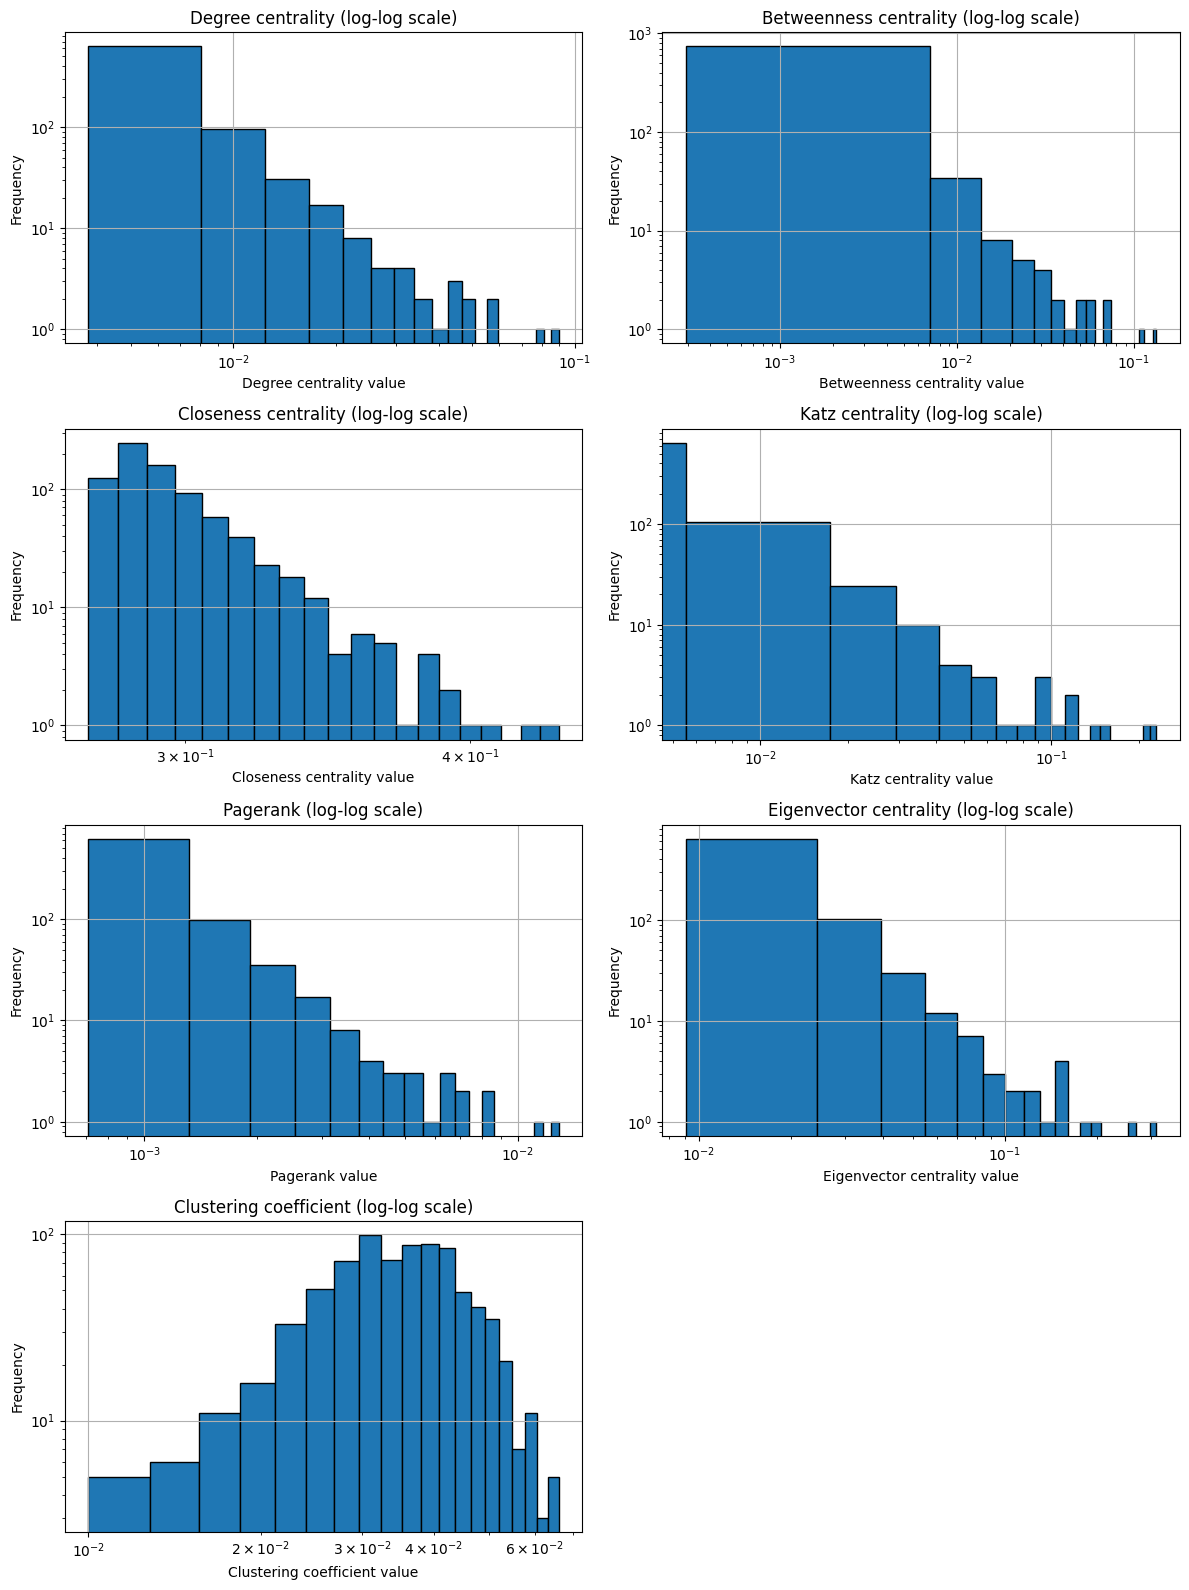

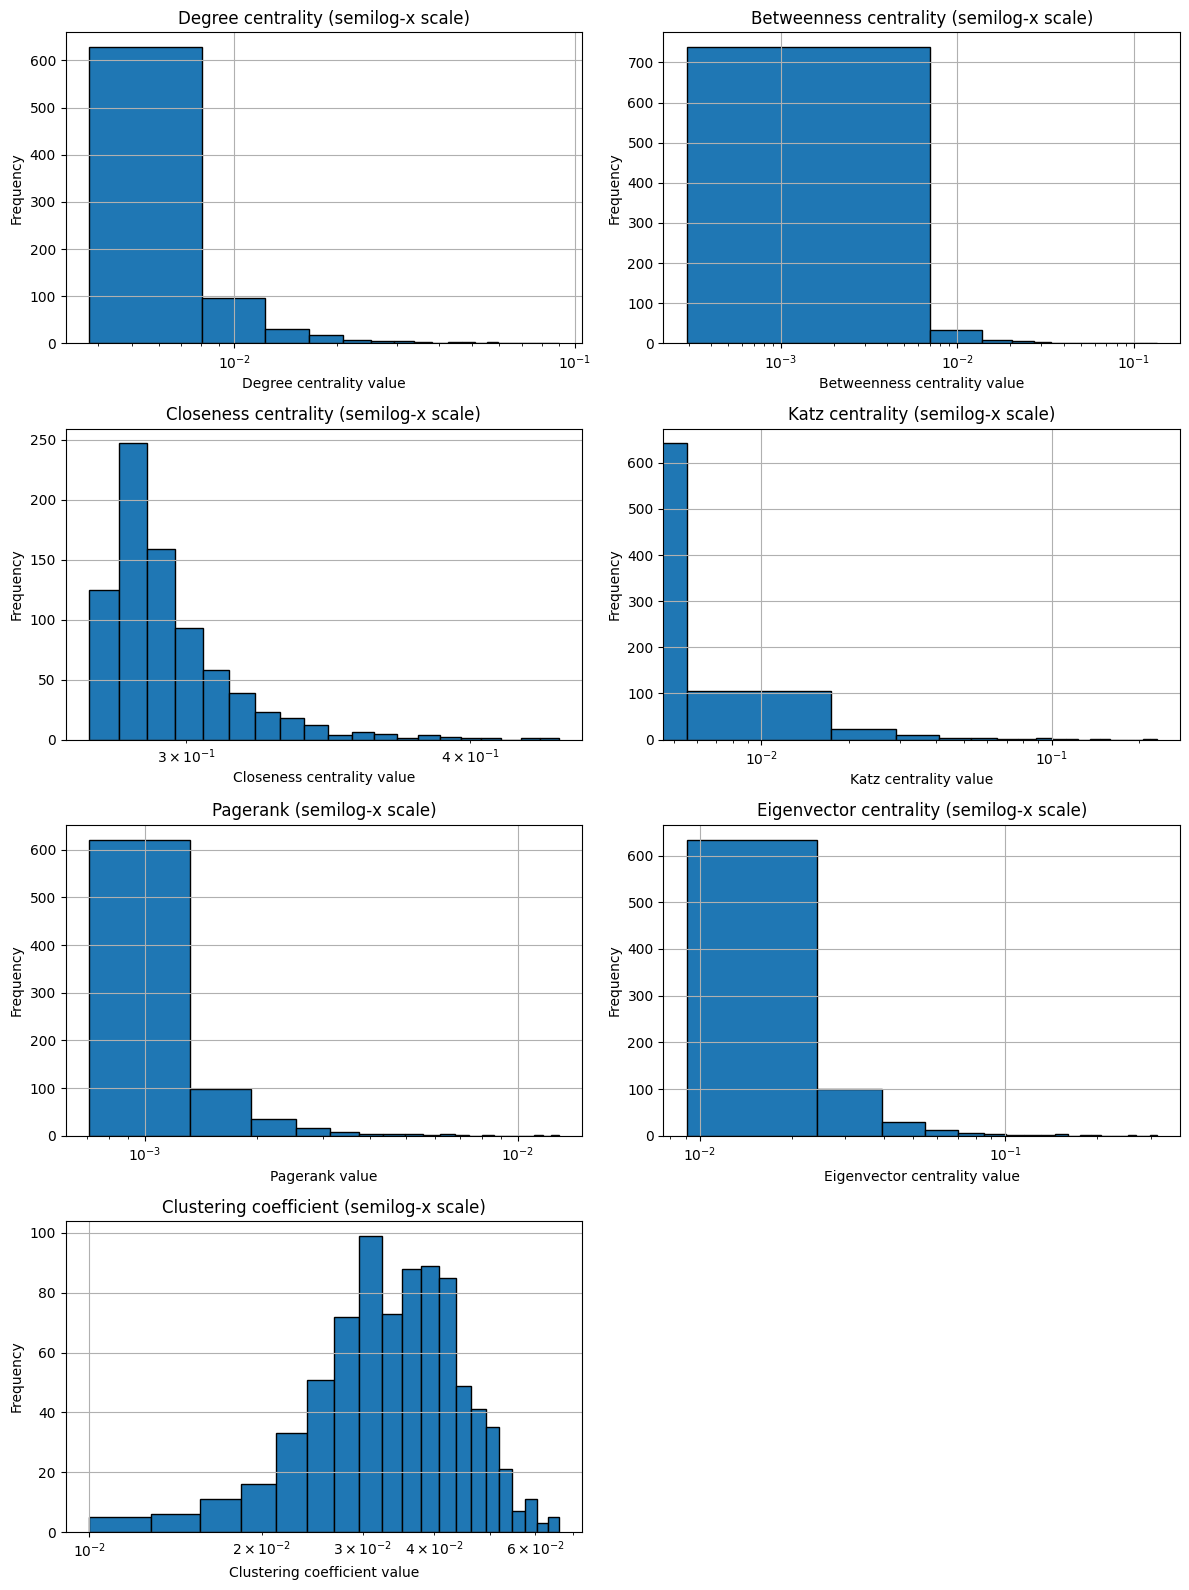

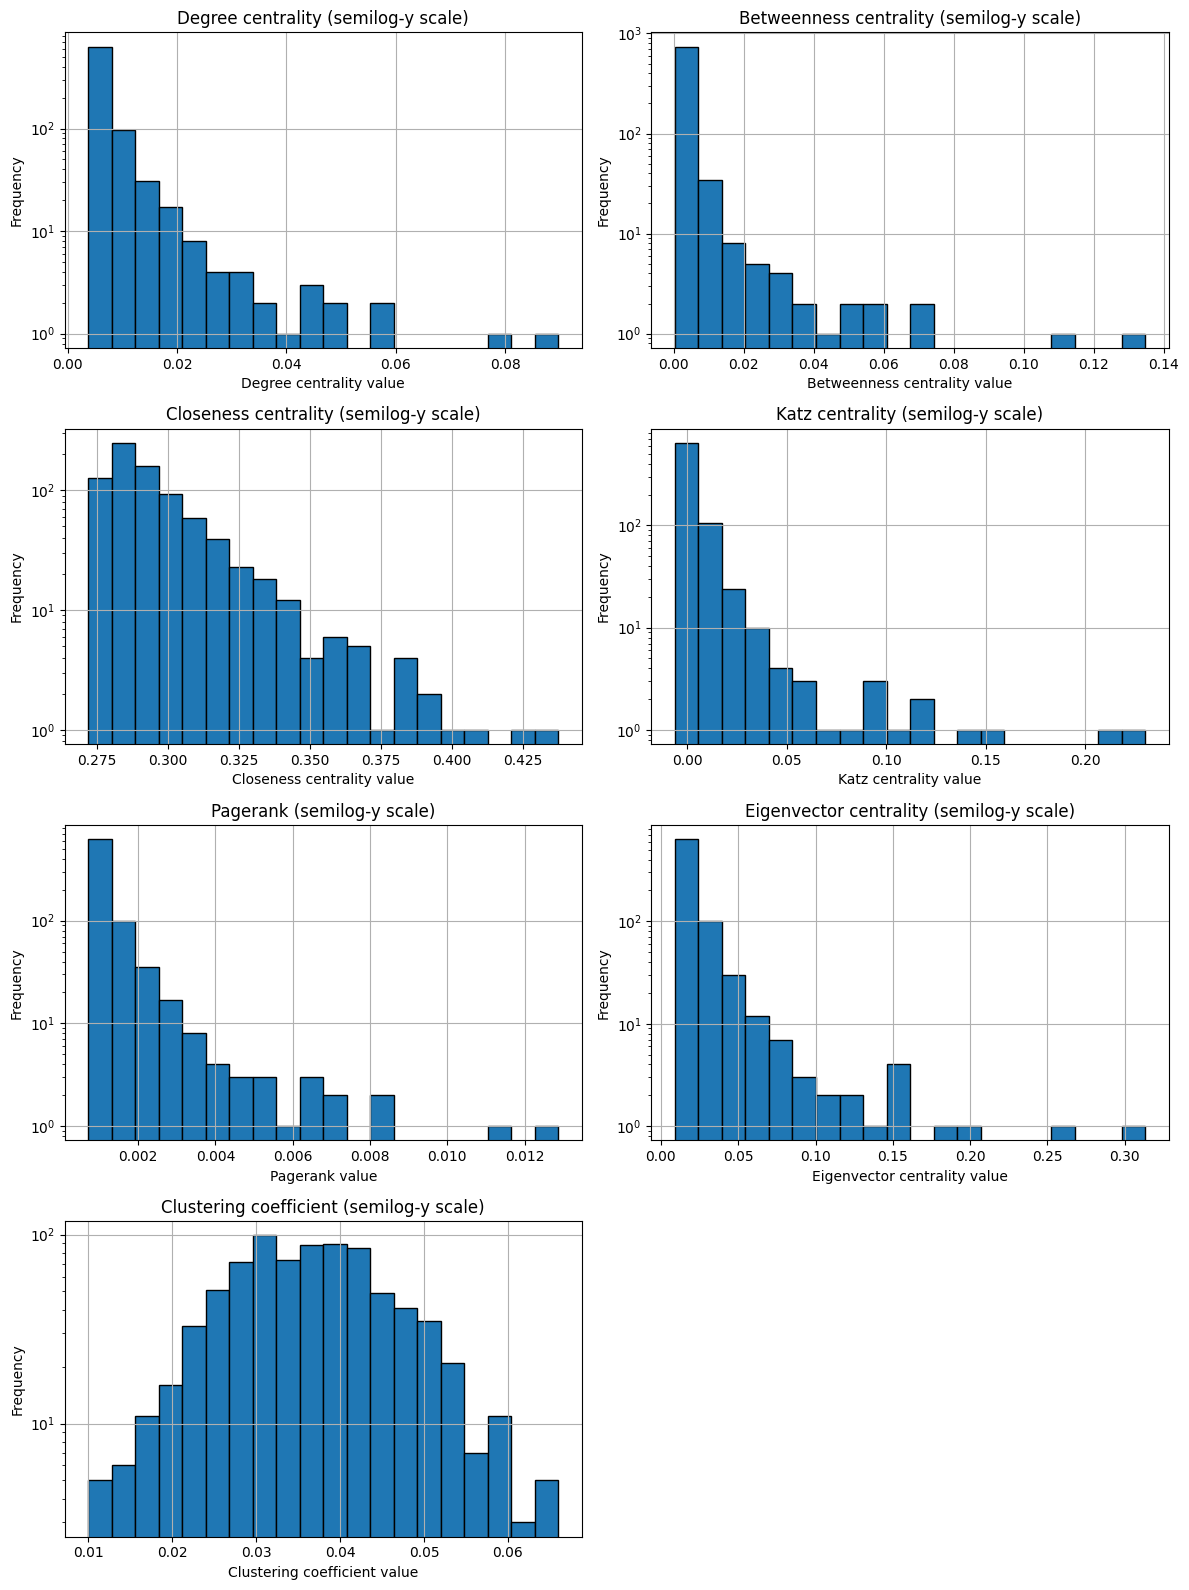

In [ ]:
# Example usage
n = 800
m = 3
num_seeds = 100

# Get average centralities
centralities = average_centrality_measurements_barabasi_albert(n, m, num_seeds)

# Plot the centralities
plot_centrality_distributions(centralities)


plot_centrality_distributions_with_scales(centralities, scales=['linear', 'log-log', 'semilog-x', 'semilog-y'])

#Centralidades de vector propio y prestigio dentro de la red; Centralidades de grado-in y grado-out


In [ ]:
# 1. Centralidad de vector propio
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Ordenar los nodos por centralidad de vector propio (de mayor a menor)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Imprimir los primeros 10 nodos según la centralidad de vector propio
print("Top 10 nodos por Centralidad de Vector Propio:")
for node, centrality in sorted_eigenvector[:10]:
    print(f"Nodo {node}: {centrality:.4f}")

# 2. Centralidad de prestigio (asignando cero a nodos con in-degree 0)
def prestige_centrality(G, alpha=1.0):
    """
    Calcula la centralidad de prestigio para un grafo dirigido G.
    alpha es un parámetro que escala la influencia de los emisores.
    """
    # Obtener la matriz de adyacencia del grafo
    A = nx.to_numpy_array(G).T  # Transpuesta para contar las aristas entrantes
    n = A.shape[0]

    # Crear el vector de grados entrantes (in-degree)
    in_degree = np.sum(A, axis=0)

    # Crear una matriz de prestigio, asignando cero a los nodos con in-degree cero
    P = np.zeros_like(A)  # Inicializar la matriz con ceros
    for i in range(n):
        if in_degree[i] > 0:
            P[i] = A[i] / in_degree[i]

    # Calcular la centralidad de prestigio como solución al sistema lineal
    b = np.ones(n)  # Vector de 1s
    try:
        prestige = np.linalg.solve(np.eye(n) - alpha * P, b)
    except np.linalg.LinAlgError:
        prestige = np.zeros(n)  # En caso de error en la solución del sistema

    # Asignar centralidad de prestigio cero a nodos con in-degree cero
    prestige[in_degree == 0] = 0

    # Normalizar la centralidad de prestigio
    prestige = prestige / np.sum(prestige)

    return dict(zip(G.nodes(), prestige))

prestige = prestige_centrality(G)

# Filtrar los nodos con centralidad de prestigio mayor que cero y ordenarlos
sorted_prestige = sorted(((node, centrality) for node, centrality in prestige.items() if centrality > 0),
                         key=lambda x: x[1], reverse=True)

# Imprimir los primeros 10 nodos con centralidad de prestigio mayor que cero
print("\nTop 10 nodos por Centralidad de Prestigio (descartando los de valor cero):")
for node, centrality in sorted_prestige[:10]:
    print(f"Nodo {node}: {centrality:.4f}")



Top 10 nodos por Centralidad de Vector Propio:
Nodo UGA4: 0.3421
Nodo GCV2: 0.3421
Nodo ASP3-1: 0.2613
Nodo ASP3-2: 0.2613
Nodo ASP3-3: 0.2613
Nodo GAP1: 0.2613
Nodo ASP3-4: 0.2613
Nodo GAT1: 0.2114
Nodo DAL80: 0.2114
Nodo ECM38: 0.2114

Top 10 nodos por Centralidad de Prestigio (descartando los de valor cero):
Nodo CHA4: 0.0220
Nodo ARO80: 0.0183
Nodo PPR1: 0.0147
Nodo IXR1: 0.0147
Nodo PUT3: 0.0147
Nodo SIP4: 0.0126
Nodo MET31: 0.0122
Nodo MET32: 0.0122
Nodo UPC2: 0.0122
Nodo ECM22: 0.0110


In [ ]:
# 1. Centralidad de grado de entrada (In-degree Centrality)
in_degree_centrality = dict(G.in_degree())

# 2. Centralidad de grado de salida (Out-degree Centrality)
out_degree_centrality = dict(G.out_degree())

# Ordenar las centralidades de mayor a menor
sorted_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Imprimir los primeros 10 nodos de in-degree centrality
print("Top 10 nodos por Centralidad de Grado de Entrada (In-Degree Centrality):")
for node, centrality in sorted_in_degree[:10]:
    print(f"Nodo {node}: {centrality}")

# Imprimir los primeros 10 nodos de out-degree centrality
print("\nTop 10 nodos por Centralidad de Grado de Salida (Out-Degree Centrality):")
for node, centrality in sorted_out_degree[:10]:
    print(f"Nodo {node}: {centrality}")

Top 10 nodos por Centralidad de Grado de Entrada (In-Degree Centrality):
Nodo CIT1: 7
Nodo GCV3: 7
Nodo CYB2: 6
Nodo GDH1: 6
Nodo JEN1: 6
Nodo SUC2: 6
Nodo UGA4: 6
Nodo GCV2: 5
Nodo GLN1: 5
Nodo LPD1: 5

Top 10 nodos por Centralidad de Grado de Salida (Out-Degree Centrality):
Nodo glc[e]: 66
Nodo GCN4: 57
Nodo GLN3: 31
Nodo HAP2: 23
Nodo PHO2: 21
Nodo MIG1: 20
Nodo HAP3: 20
Nodo BAS1: 18
Nodo DAL80: 18
Nodo HAP4: 17


#Centralidad combinada y distribución de grado


A modo de comparación y más concorde al trabajo previo sobre este tipo de redes lo que se hizo fue determinar un puntaje de centralidad combinada en función de las individuales para cada gen, destacando su relación con la esencialidad tal que esta toma peso de manera inversamente proporcional al valor de la centralidad combinada, por lo que al final se destaca en un top los agentes con valores mínimo de este puntaje que indicarían una mayor esencialidad dentro de la red.

In [ ]:
# Calcular la centralidad combinada (CS(v))
def calcular_centralidad_combinada(centrality_measures):
    # Inicializar un diccionario para la centralidad combinada
    centralidad_combinada = {}

    # Obtener los nombres de las centralidades
    nombres_centrality_measures = list(centrality_measures.keys())

    # Calcular el puntaje combinado para cada nodo
    for nodo in G.nodes():
        # Obtener los puntajes de centralidad para el nodo
        puntajes = [centrality_measures[nombre][nodo] for nombre in nombres_centrality_measures]

        # Normalizar los puntajes
        max_puntaje = max(puntajes)
        min_puntaje = min(puntajes)

        # Calcular CS(v) como un promedio normalizado
        if max_puntaje != min_puntaje:  # Evitar división por cero
            cs_v = sum((puntaje - min_puntaje) / (max_puntaje - min_puntaje) for puntaje in puntajes) / len(puntajes)
        else:
            cs_v = 0  # Si todos los puntajes son iguales

        centralidad_combinada[nodo] = cs_v

    return centralidad_combinada

# Calcular la centralidad combinada
centralidad_combinada = calcular_centralidad_combinada(centrality_measures)

# Imprimir los resultados
print("Centralidad Combinada (CS(v)):")
for nodo, puntaje in centralidad_combinada.items():
    print(f"Nodo {nodo}: {puntaje}")

# Extraer los puntajes de centralidad combinada en un DataFrame
df_centralidad = pd.DataFrame(centralidad_combinada.items(), columns=['Gene', 'Combined Centrality'])

# Seleccionar el top 5 genes con menores puntajes de centralidad combinada
top_5_genes = df_centralidad.nsmallest(10, 'Combined Centrality')

# Seleccionar el top 5 genes con mayores puntajes de centralidad combinada
top_5_genes_not = df_centralidad.nlargest(10, 'Combined Centrality')

# Mostrar el top 5
print("\nTop 5 Genes con mayores puntajes de esencialidad (o menores de centralidad combinada):")
print(top_5_genes)

print("\nTop 5 Genes con menores puntajes de esencialidad (o mayores de centralidad combinada):")
print(top_5_genes_not)

Centralidad Combinada (CS(v)):
Nodo mi145tp-D: 0.1169702055241461
Nodo ARG81: 0.1441672433837318
Nodo 25aics: 0.1188182831506482
Nodo BAS1: 0.13056565293896277
Nodo atp: 0.1188182831506482
Nodo allphn: 0.11694970484975424
Nodo DAL82: 0.14416035664116117
Nodo 2ippm: 0.11736374402256883
Nodo LEU3: 0.13698137286512652
Nodo L2aadp6sa: 0.11710004312862779
Nodo LYS14: 0.14421085942001236
Nodo amet: 0.11321172011195278
Nodo MET31: 0.18735137876699134
Nodo met-L[e]: 0.11225836611994507
Nodo MET32: 0.18735137876699134
Nodo MET4: 0.14014651389406474
Nodo dhor-S: 0.11642385258642401
Nodo PPR1: 0.2241698680065933
Nodo orot: 0.11642385258642401
Nodo utp: 0.11411107045672991
Nodo gln-L[e]: 0.11360864778763473
Nodo RTG1: 0.1310075723546445
Nodo RTG3: 0.13485347456062516
Nodo sterols[icp]: 0.1133402604630222
Nodo ECM22: 0.16946814740045968
Nodo UPC2: 0.18737861076096574
Nodo MIG1: 0.11780388111150021
Nodo CAT8: 0.12709755344536286
Nodo MIG2: 0.13561016588182062
Nodo GAT1: 0.13753759254843156
Nodo DAL8

#Ajuste: Ley de potencia para la frecuencia en función de los grados totales dentro de la red (inclusión de suavizado por Kernel)

Se realizó un ajuste a los grados totales máximos de la distribución dentro de la red tal que determinamos una ley de potencia con un exponente cercano a 3, así mismo se incluyó un suavizado por Kernel tal que construye una estimación de la densidad de probabilidad (sin una distribución predefinida sino descubriendo la forma a partir de los datos) utilizando una suma de funciones kernel centradas en cada uno de los puntos de datos.

Calculating best minimal value for power law fit
Exponente de la Ley de Potencia: 2.63474357101362


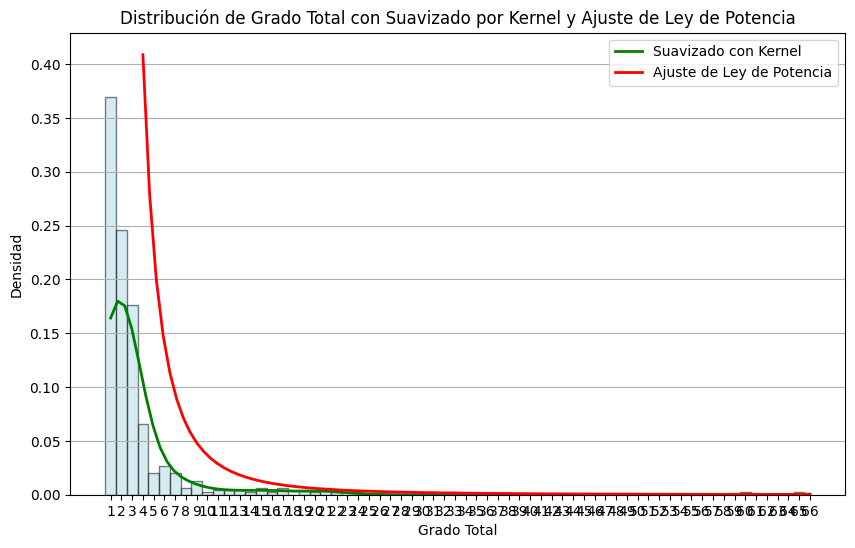

In [ ]:

# Usar los grados totales previamente presentados
degree_table['Grado Total'] = degree_table['Grado de entrada'] + degree_table['Grado de salida']

# Extraer los valores del Grado Total en una lista
grado_total_values = degree_table['Grado Total'].values

# ---- Ajuste de la Ley de Potencia ---- #

# Función para ajustar una ley de potencia
def fit_power_law(data):
    data = np.array(data)
    data = data[data > 0]  # Filtrar valores negativos o cero
    if len(data) == 0:
        return None, None, None
    # Ajustar la ley de potencia
    fit = powerlaw.Fit(data)
    return fit.alpha, fit.xmin, fit  # Devuelve el exponente, el xmin ajustado y el objeto de ajuste

# Calcular el ajuste para el Grado Total
alpha, xmin, fit = fit_power_law(grado_total_values)

if alpha is not None:
    print(f'Exponente de la Ley de Potencia: {alpha}')
else:
    print('No se pudo ajustar una ley de potencia.')

# ---- Visualización: Histograma, Suavizado Kernel y Ajuste de Ley de Potencia ---- #

# Suavizado con Kernel para el Grado Total
kde = gaussian_kde(grado_total_values)
x_kde = np.linspace(min(grado_total_values), max(grado_total_values), 100)
y_kde = kde(x_kde)

# Graficar el histograma del Grado Total
plt.figure(figsize=(10, 6))
plt.hist(grado_total_values, bins=range(1, max(grado_total_values) + 1), align='left', density=True, color='lightblue', edgecolor='black', alpha=0.5)

# Graficar el suavizado por kernel
plt.plot(x_kde, y_kde, color='green', lw=2, label='Suavizado con Kernel')

# Si el ajuste de ley de potencia fue exitoso, graficar el ajuste
if fit is not None:
    x = np.linspace(xmin, max(grado_total_values), 100)  # Rango de valores para la densidad ajustada
    pdf = fit.power_law.pdf(x)
    plt.plot(x, pdf, color='red', lw=2, label='Ajuste de Ley de Potencia')

# Personalización del gráfico
plt.title('Distribución de Grado Total con Suavizado por Kernel y Ajuste de Ley de Potencia')
plt.xlabel('Grado Total')
plt.ylabel('Densidad')
plt.xticks(range(1, max(grado_total_values) + 1))
plt.grid(axis='y')
plt.legend()
plt.show()


#Cosas a partir de la matriz de adyacencia
No tan útil pal trabajo

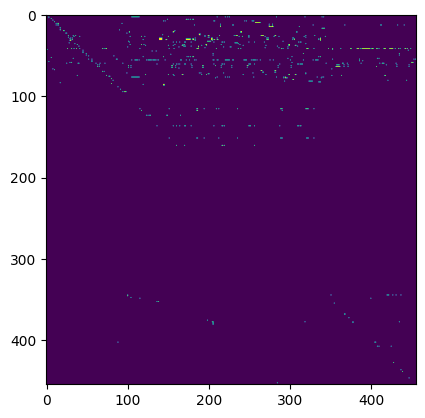

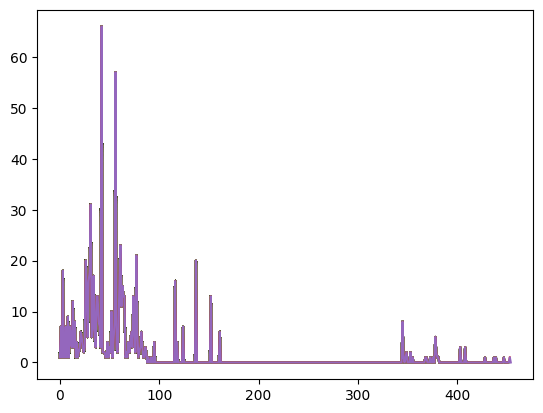

Nodes with in-degree > 300: []
Nodes with out-degree > 300: []


In [ ]:
matA=nx.adjacency_matrix(G).todense()
plt.imshow(matA)
plt.show()
Nv=len(matA)
Degrees=[]
for i in range(Nv):
    Degrees.append(sum(matA[i]))
    plt.plot(Degrees)
plt.show()

# Get the list of nodes whose in-degree is greater than 300
in_degree_nodes = np.array([node for node, in_deg in G.in_degree() if in_deg > 300])

# Get the list of nodes whose out-degree is greater than 300
out_degree_nodes = np.array([node for node, out_deg in G.out_degree() if out_deg > 300])

print("Nodes with in-degree > 300:", in_degree_nodes)
print("Nodes with out-degree > 300:", out_degree_nodes)

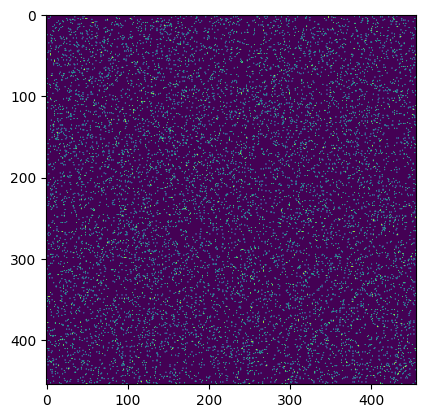

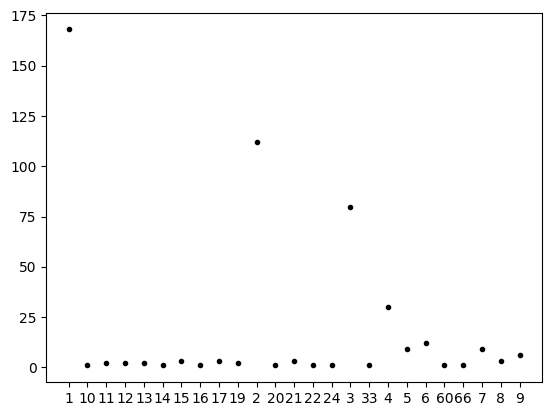

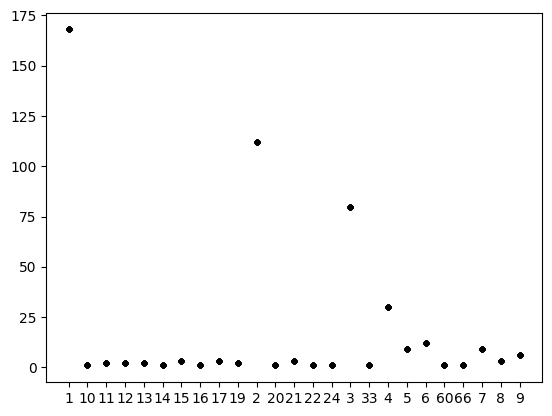

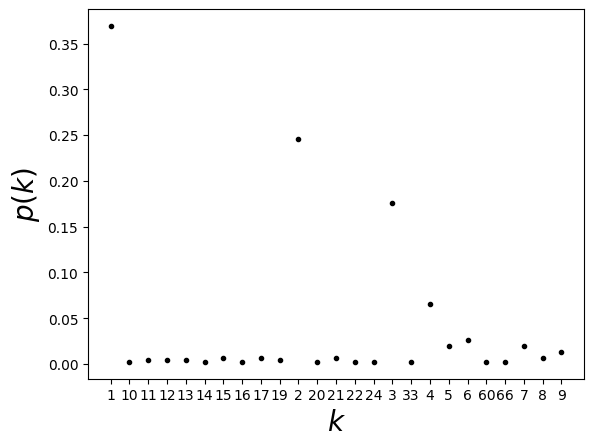

In [ ]:
def Coin(p):
    val=np.random.rand()
    if val<=p:
        out=1
    else:
        out=0
    return out
    Nv=len(matA)
p=0.05
matB=np.zeros([Nv,Nv])
for i in range(Nv):
    for j in range(i,Nv):
        matB[i][j]=Coin(p)
        matB[j][i]=matB[i][j]
    matB[i][i]=0
    plt.imshow(matB)
plt.show()

Degrees=np.array(nx.degree(G)).T[1]
vals,freq=np.unique(Degrees,return_counts=True)
np.unique(Degrees,return_counts=True)
plt.plot(vals,freq,'k.')
plt.show()

p=0.1
for rr in range(20):
    Degrees=np.array(nx.degree(G)).T[1]
    vals,freq=np.unique(Degrees,return_counts=True)
    plt.plot(vals,freq,'k.')
plt.show()

Data=[]
p=0.1
for rr in range(1000):
    Degrees=list(np.array(nx.degree(G)).T[1])
    Data.append(Degrees)
Data=np.array(Data).flatten()
vals,freq=np.unique(Data,return_counts=True)
plt.plot(vals,freq/sum(freq),'k.')
plt.ylabel(r'$p(k)$',size=20)
plt.xlabel(r'$k$',size=20)
plt.show()

#FPT posibles en el grafo

     Nodo de Entrada  Nodo de Salida  FPT
72                51             336    2
63                47             130    2
22                11             278    2
75                53             180    2
1                  0             123    2
..               ...             ...  ...
51                36              35    1
49                34             178    1
48                32             204    1
47                30             204    1
148              453             284    1

[149 rows x 3 columns]


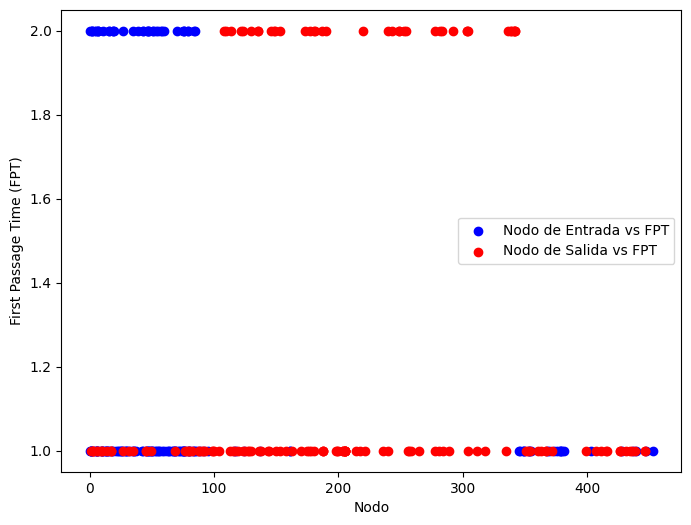

In [ ]:
import numpy as np

def random_walker(A, initial, final, max_steps=10000):
    Nv = len(matA)  # Número de nodos en el grafo
    Degrees = np.sum(matA, axis=1)  # Grado saliente para cada nodo

    # Normalizamos la matriz de adyacencia por los grados
    matW = np.zeros_like(A, dtype=float)
    for i in range(Nv):
        if Degrees[i] != 0:
            matW[i] = matA[i] / Degrees[i]

    # Definimos el caminante aleatorio
    Nodes = list(range(Nv))
    pos = initial
    t = 0

    while pos != final and t < max_steps:
        probabilities = matW[pos]
        if probabilities.sum() > 0:
            probabilities /= probabilities.sum()  # Asegura que las probabilidades sumen 1
        else:
            break  # Si las probabilidades son 0, no se puede mover

        pos = np.random.choice(Nodes, p=probabilities)
        t += 1

    if pos == final:
        return t  # Devuelve el tiempo FPT si llegó al nodo final
    else:
        return None  # Si no llegó al nodo final en el límite de pasos

G = nx.from_numpy_array(matA, create_using=nx.DiGraph())  # Crear un grafo dirigido

# Generamos los nodos alcanzables desde cada nodo usando DFS
results = []

for initial_node in range(len(matA)):
    reachable_nodes_dfs = list(nx.dfs_preorder_nodes(G, source=initial_node))

    for final_node in reachable_nodes_dfs:
        if final_node != initial_node:
            fpt = random_walker(matA, initial_node, final_node)
            if fpt is not None:
                results.append([initial_node, final_node, fpt])

# Convertir los resultados a un DataFrame para una mejor visualización
df_results = pd.DataFrame(results, columns=["Nodo de Entrada", "Nodo de Salida", "FPT"])

# Ordenar el DataFrame de mayor a menor FPT
df_results_sorted = df_results.sort_values(by="FPT", ascending=False)

# Mostrar el DataFrame ordenado
print(df_results_sorted)

# Visualizar los resultados ordenados
plt.figure(figsize=(8, 6))
plt.scatter(df_results_sorted["Nodo de Entrada"], df_results_sorted["FPT"], color='blue', label='Nodo de Entrada vs FPT')
plt.scatter(df_results_sorted["Nodo de Salida"], df_results_sorted["FPT"], color='red', label='Nodo de Salida vs FPT')
plt.xlabel("Nodo")
plt.ylabel("First Passage Time (FPT)")
plt.legend()
plt.show()


#Primer Grafo Dirigido (IGNORAR)

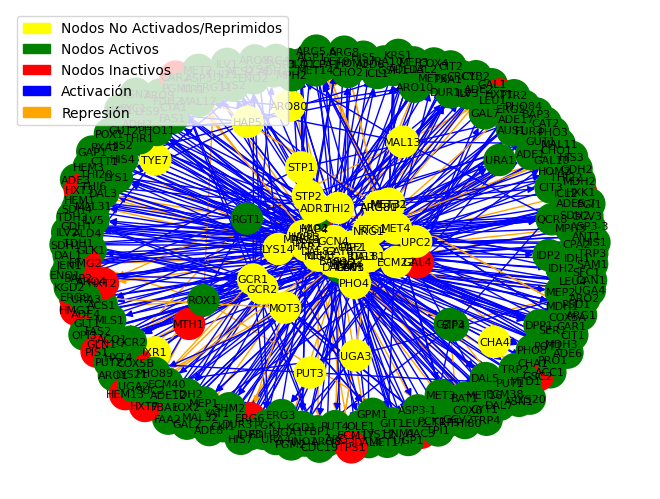


Top 5 Nodos por Promedio de Centralidades y Grado Total:
       Promedio Centralidades  Grado Total    Ranking
GCN4                21.381465           57  39.190732
GLN3                11.631465           31  21.315732
HAP2                 8.631465           23  15.815732
DAL80                7.885006           21  14.442503
PHO2                 7.881465           21  14.440732
{'MIG1': 20, 'CAT8': 17, 'MIG2': 6, 'GAT1': 18, 'DAL80': 21, 'GLN3': 31, 'GZF3': 7, 'GAL4': 8, 'HAP4': 18, 'RGT1': 6, 'MTH1': 4, 'ADR1': 13, 'PIP2': 14, 'HAP1': 8, 'ROX1': 8, 'SIP4': 4, 'AAC3': 1, 'ACC1': 3, 'INO2': 15, 'INO4': 13, 'ACO1': 3, 'RTG1': 6, 'RTG3': 5, 'ACS1': 2, 'ACS2': 2, 'BAS1': 18, 'ADE1': 3, 'GCN4': 57, 'PHO2': 21, 'ADE12': 2, 'ADE13': 2, 'ADE17': 2, 'ADE2': 3, 'ADE3': 3, 'ADE4': 3, 'ADE5,7': 3, 'ADE6': 2, 'ADE8': 3, 'GCR1': 16, 'ADH1': 1, 'ADH2': 3, 'TYE7': 4, 'DAL81': 10, 'AGP1': 3, 'STP1': 3, 'ALD4': 1, 'ALD6': 1, 'OAF1': 13, 'ANT1': 2, 'ARG80': 7, 'ARG1': 3, 'ARG81': 7, 'ARG3': 3, 'ARG4': 1

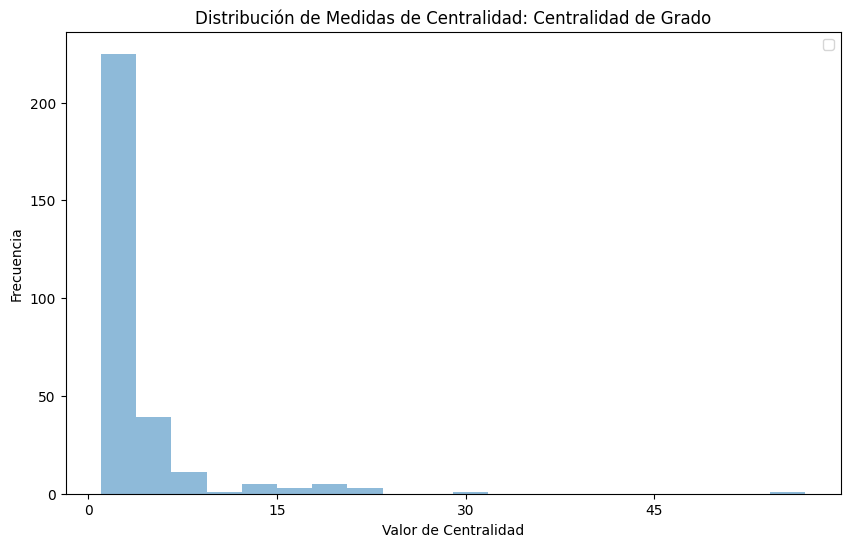

{'MIG1': 0.0, 'CAT8': 0.0013909018654448548, 'MIG2': 0.0008064893169386132, 'GAT1': 0.00020454439197718451, 'DAL80': 0.0002746738977979335, 'GLN3': 0.0, 'GZF3': 1.168825097012483e-05, 'GAL4': 5.844125485062415e-05, 'HAP4': 0.0009350600776099864, 'RGT1': 0.000479218289775118, 'MTH1': 4.675300388049932e-05, 'ADR1': 0.0, 'PIP2': 0.00010519425873112346, 'HAP1': 0.0, 'ROX1': 7.012950582074898e-05, 'SIP4': 0.0, 'AAC3': 0.0, 'ACC1': 0.0, 'INO2': 0.0, 'INO4': 0.0, 'ACO1': 0.0, 'RTG1': 0.0, 'RTG3': 0.0, 'ACS1': 0.0, 'ACS2': 0.0, 'BAS1': 0.0, 'ADE1': 0.0, 'GCN4': 0.0, 'PHO2': 0.0, 'ADE12': 0.0, 'ADE13': 0.0, 'ADE17': 0.0, 'ADE2': 0.0, 'ADE3': 0.0, 'ADE4': 0.0, 'ADE5,7': 0.0, 'ADE6': 0.0, 'ADE8': 0.0, 'GCR1': 0.0, 'ADH1': 0.0, 'ADH2': 0.0, 'TYE7': 0.0, 'DAL81': 0.0, 'AGP1': 0.0, 'STP1': 0.0, 'ALD4': 0.0, 'ALD6': 0.0, 'OAF1': 0.0, 'ANT1': 0.0, 'ARG80': 0.0, 'ARG1': 0.0, 'ARG81': 0.0, 'ARG3': 0.0, 'ARG4': 0.0, 'ARG5,6': 0.0, 'ARG8': 0.0, 'ARO1': 0.0, 'ARO80': 0.0, 'ARO10': 0.0, 'ARO2': 0.0, 'ARO3':

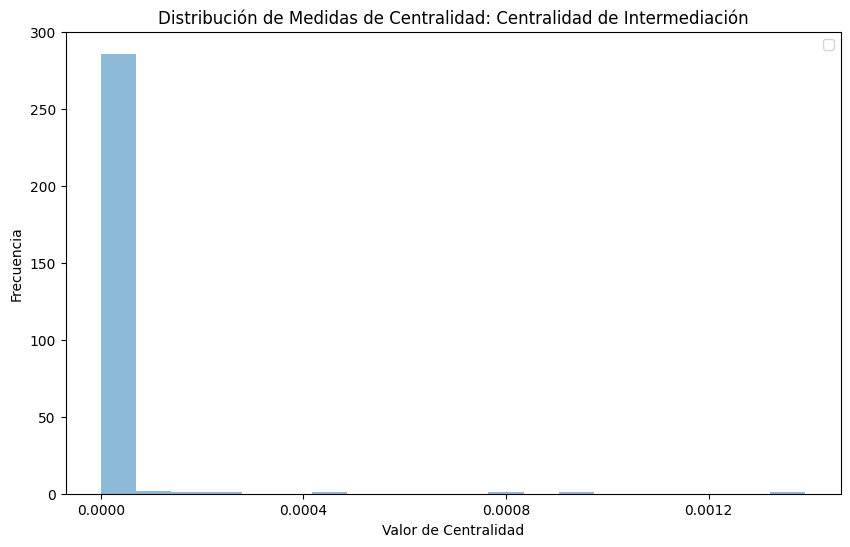

{'MIG1': 0.0, 'CAT8': 0.0078010726474890294, 'MIG2': 0.005119453924914676, 'GAT1': 0.007679180887372013, 'DAL80': 0.010238907849829351, 'GLN3': 0.0, 'GZF3': 0.007679180887372013, 'GAL4': 0.0034129692832764505, 'HAP4': 0.007110352673492606, 'RGT1': 0.004550625711035267, 'MTH1': 0.0034129692832764505, 'ADR1': 0.0, 'PIP2': 0.0034129692832764505, 'HAP1': 0.0, 'ROX1': 0.0034129692832764505, 'SIP4': 0.007110352673492606, 'AAC3': 0.004550625711035267, 'ACC1': 0.010921501706484642, 'INO2': 0.0, 'INO4': 0.0, 'ACO1': 0.010921501706484642, 'RTG1': 0.0, 'RTG3': 0.0, 'ACS1': 0.009451299553688633, 'ACS2': 0.006825938566552901, 'BAS1': 0.0, 'ADE1': 0.010238907849829351, 'GCN4': 0.0, 'PHO2': 0.0, 'ADE12': 0.006825938566552901, 'ADE13': 0.006825938566552901, 'ADE17': 0.006825938566552901, 'ADE2': 0.010238907849829351, 'ADE3': 0.010238907849829351, 'ADE4': 0.010238907849829351, 'ADE5,7': 0.010238907849829351, 'ADE6': 0.006825938566552901, 'ADE8': 0.010238907849829351, 'GCR1': 0.0, 'ADH1': 0.003412969283

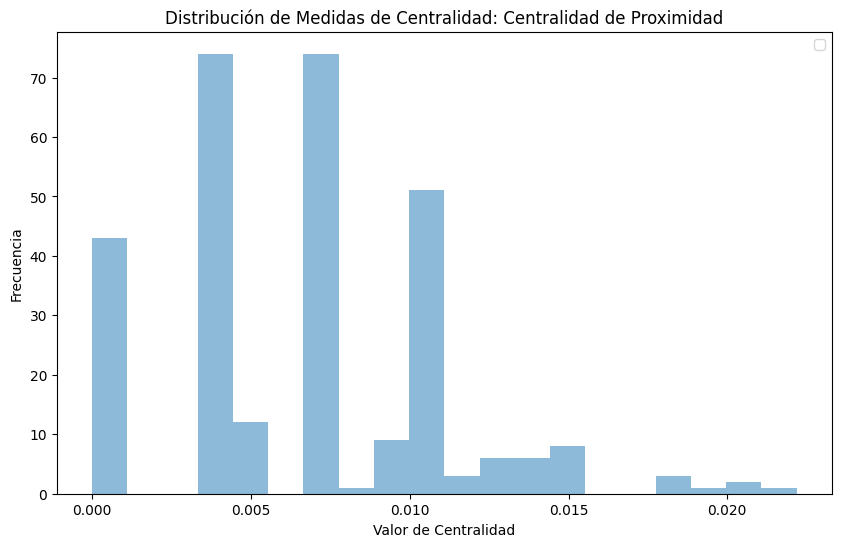

{'MIG1': 0.04879673867809677, 'CAT8': 0.059097730213043, 'MIG2': 0.054213176671365514, 'GAT1': 0.061357243678836805, 'DAL80': 0.06579331127499777, 'GLN3': 0.04879673867809677, 'GZF3': 0.05981211446729034, 'GAL4': 0.05367641254590645, 'HAP4': 0.05470651169940108, 'RGT1': 0.05416437993268742, 'MTH1': 0.05367641254590645, 'ADR1': 0.04879673867809677, 'PIP2': 0.05367641254590645, 'HAP1': 0.04879673867809677, 'ROX1': 0.05367641254590645, 'SIP4': 0.05470651169940108, 'AAC3': 0.05416437993268742, 'ACC1': 0.06392372766830677, 'INO2': 0.04879673867809677, 'INO4': 0.04879673867809677, 'ACO1': 0.06402673758365623, 'RTG1': 0.04879673867809677, 'RTG3': 0.04879673867809677, 'ACS1': 0.059586185567210743, 'ACS2': 0.058556086413716124, 'BAS1': 0.04879673867809677, 'ADE1': 0.06343576028152581, 'GCN4': 0.04879673867809677, 'PHO2': 0.04879673867809677, 'ADE12': 0.058556086413716124, 'ADE13': 0.058556086413716124, 'ADE17': 0.058556086413716124, 'ADE2': 0.06343576028152581, 'ADE3': 0.06343576028152581, 'ADE

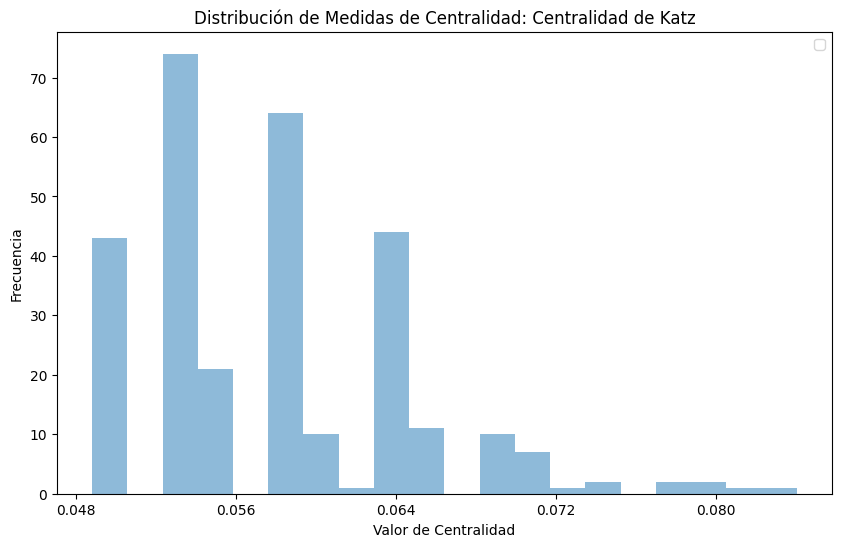

{'MIG1': 0.002921680837686664, 'CAT8': 0.003651977066906929, 'MIG2': 0.0035650700027214165, 'GAT1': 0.0036414303536639074, 'DAL80': 0.003738461779514279, 'GLN3': 0.002921680837686664, 'GZF3': 0.003195247260780116, 'GAL4': 0.0030458607554505316, 'HAP4': 0.003128615713125857, 'RGT1': 0.00378471436792997, 'MTH1': 0.0030458607554505316, 'ADR1': 0.002921680837686664, 'PIP2': 0.003112726865015691, 'HAP1': 0.002921680837686664, 'ROX1': 0.0032321306320963333, 'SIP4': 0.003128615713125857, 'AAC3': 0.0033141599725307735, 'ACC1': 0.003648171601662265, 'INO2': 0.002921680837686664, 'INO4': 0.002921680837686664, 'ACO1': 0.003988780074399876, 'RTG1': 0.002921680837686664, 'RTG3': 0.002921680837686664, 'ACS1': 0.003319661740454884, 'ACS2': 0.0032783000887008484, 'BAS1': 0.002921680837686664, 'ADE1': 0.0032214970134072803, 'GCN4': 0.002921680837686664, 'PHO2': 0.002921680837686664, 'ADE12': 0.003177925112437502, 'ADE13': 0.003177925112437502, 'ADE17': 0.003177925112437502, 'ADE2': 0.003221497013407280

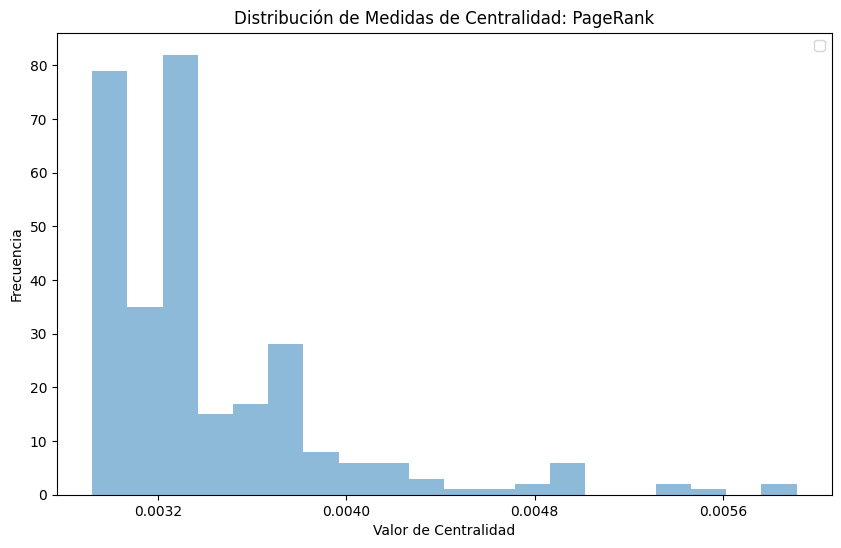

In [ ]:
# Cargar los dos primeros cuadernos del archivo .xls (modifica la ruta si es necesario)
file_path = directory_in+'iMH805_775_regnetwork.xls'
sheet1 = pd.read_excel(file_path, sheet_name=0)
sheet2 = pd.read_excel(file_path, sheet_name=1)

# Seleccionar las primeras 4 columnas de ambos cuadernos con los nombres correctos
columns_sheet1 = ['Target TF', 'Regulator TF', 'Regulator signal', 'Act/Rep']
columns_sheet2 = ['Target', 'Regulator TF', 'Regulator signal', 'Act/Rep']

df1 = sheet1[columns_sheet1]
df2 = sheet2[columns_sheet2]

# Renombrar las columnas del segundo cuaderno para que coincidan con las del primero
df2 = df2.rename(columns={'Target': 'Target TF'})

# Combinar los dos cuadernos en un solo DataFrame
df_filtered = pd.concat([df1, df2], ignore_index=True)

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir las aristas basadas en el DataFrame
for index, row in df_filtered.iterrows():
    regulator = row['Regulator TF']
    target = row['Target TF']
    act_rep = row['Act/Rep']

    # Verificar si los valores no son NA antes de añadir la arista
    if pd.notna(regulator) and pd.notna(target) and pd.notna(act_rep):
        # Añadir la arista, etiquetando con el tipo de interacción (Activación o Represión)
        if act_rep == 'A':
            G.add_edge(regulator, target, color='blue', interaction='Activación')
        elif act_rep == 'R':
            G.add_edge(regulator, target, color='orange', interaction='Represión')

# Asignar color a los nodos activos (A) y reprimidos (R)
node_colors = []
for node in G.nodes():
    if any(G[u][node]['interaction'] == 'Activación' for u in G.predecessors(node)):
        node_colors.append('green')  # Nodos activados
    elif any(G[u][node]['interaction'] == 'Represión' for u in G.predecessors(node)):
        node_colors.append('red')  # Nodos reprimidos
    else:
        node_colors.append('yellow')  # Nodos no activados ni reprimidos

# Dibujar el grafo
pos = nx.spring_layout(G)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=colors, node_size=500, font_size=8)

# Crear las leyendas
top_patch = mpatches.Patch(color='yellow', label='Nodos No Activados/Reprimidos')
active_patch = mpatches.Patch(color='green', label='Nodos Activos')
inactive_patch = mpatches.Patch(color='red', label='Nodos Inactivos')
blue_edge_patch = mpatches.Patch(color='blue', label='Activación')
orange_edge_patch = mpatches.Patch(color='orange', label='Represión')

plt.legend(handles=[top_patch, active_patch, inactive_patch, blue_edge_patch, orange_edge_patch])
plt.show()

# Calcular diferentes medidas de centralidad
centrality_measures = {
    'Centralidad de Grado': dict(G.degree()),
    'Centralidad de Intermediación': nx.betweenness_centrality(G),
    'Centralidad de Proximidad': nx.closeness_centrality(G),
    'Centralidad de Katz': nx.katz_centrality(G),
    'PageRank': nx.pagerank(G)
}

# Crear un DataFrame para las medidas de centralidad
centrality_df = pd.DataFrame(centrality_measures)

# Crear la tabla de grados (grado de entrada y grado de salida)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
degree_table = pd.DataFrame(list(in_degrees.items()), columns=['Nodo', 'Grado de entrada'])
degree_table['Grado de salida'] = degree_table['Nodo'].map(out_degrees)

# Calcular el grado total (suma del grado de entrada y salida)
degree_table['Grado Total'] = degree_table['Grado de entrada'] + degree_table['Grado de salida']

# Unir la tabla de grados con las medidas de centralidad
centrality_df = centrality_df.join(degree_table.set_index('Nodo'))

# Calcular el promedio de las centralidades para cada nodo
centrality_df['Promedio Centralidades'] = centrality_df.mean(axis=1)

# Ordenar los nodos por el promedio de centralidades y por el grado total
centrality_df['Ranking'] = centrality_df[['Promedio Centralidades', 'Grado Total']].mean(axis=1)
top_5_nodes = centrality_df.nlargest(5, 'Ranking')

# Obtener los nodos en el top 5
top_5_nodos = top_5_nodes.index.tolist()

print("\nTop 5 Nodos por Promedio de Centralidades y Grado Total:")
print(top_5_nodes[['Promedio Centralidades', 'Grado Total', 'Ranking']])
from matplotlib.ticker import MaxNLocator
for measure_name, measure in centrality_measures.items():
  print(measure)
  measure_values = measure.values()
  plt.figure(figsize=(10, 6))
  plt.hist(measure_values, bins=20, alpha=0.5)#, label=measure_name)
  plt.title(f'Distribución de Medidas de Centralidad: ' + measure_name)
  plt.xlabel('Valor de Centralidad')
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.gca().xaxis.set_major_locator(MaxNLocator(5))
  plt.show()

# Grafo solo de la hoja reguladora (grafo parcial IGNORAR)

   Target TF Regulator TF          Regulator signal Act/Rep
0      ARG81          NaN                 mi145tp-D       A
1       BAS1          NaN                    25aics       A
2       BAS1          NaN                       atp       R
3      DAL82          NaN                    allphn       A
4       LEU3          NaN                     2ippm       A
..       ...          ...                       ...     ...
81      GAT1          NaN  good_nitrogen_source[ep]       R
82      PPR1          NaN           pyrimidines[ep]       R
83      PUT3          NaN  poor_nitrogen_source[ep]       A
84      STP1          NaN           amino_acids[ep]       A
85      STP2          NaN           amino_acids[ep]       A

[86 rows x 4 columns]


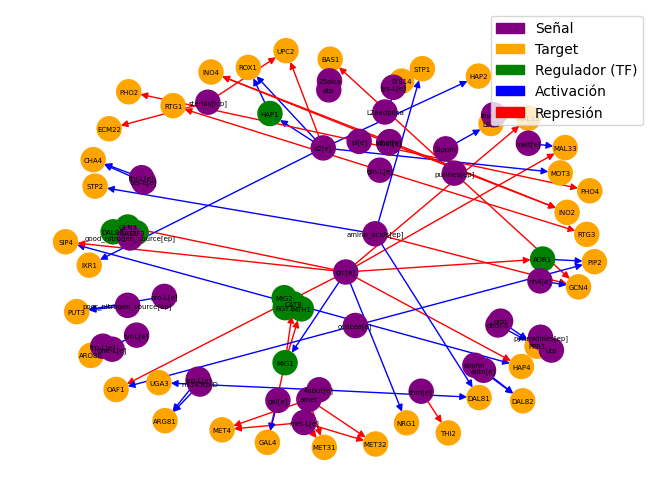

In [ ]:
# Cargar los dos primeros cuadernos del archivo .xls (modifica la ruta si es necesario)
file_path = directory_in + 'iMH805_775_regnetwork.xls'
sheet1 = pd.read_excel(file_path, sheet_name=0)
#sheet2 = pd.read_excel(file_path, sheet_name=1)

# Seleccionar las primeras 4 columnas de ambos cuadernos con los nombres correctos
columns_sheet1 = ['Target TF', 'Regulator TF', 'Regulator signal', 'Act/Rep']
#columns_sheet2 = ['Target', 'Regulator TF', 'Regulator signal', 'Act/Rep']

df1 = sheet1[columns_sheet1]
#df2 = sheet2[columns_sheet2]

print(df1)

# Renombrar las columnas del segundo cuaderno para que coincidan con las del primero
#df2 = df2.rename(columns={'Target': 'Target TF'})

# Combinar los dos cuadernos en un solo DataFrame
df_filtered = df1 #pd.concat([df1, df2], ignore_index=True)

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir los nodos y las aristas basadas en el DataFrame
for index, row in df_filtered.iterrows():
    regulator = row['Regulator TF']
    target = row['Target TF']
    signal = row['Regulator signal']
    act_rep = row['Act/Rep']

    # Añadir los nodos y clasificarlos según su tipo
    if pd.notna(target) and target not in df_filtered['Regulator TF'].values:
        G.add_node(target, node_type='target', color='orange')
    if pd.notna(regulator):
        G.add_node(regulator, node_type='TF', color='green')
    if pd.notna(signal):
        G.add_node(signal, node_type='signal', color='purple')

    # Verificar si los valores no son NA antes de añadir la arista
    if pd.notna(regulator) and pd.notna(target) and pd.notna(act_rep):
        # Añadir la arista, etiquetando con el tipo de interacción (Activación o Represión)
        if act_rep == 'A':
            G.add_edge(regulator, target, color='blue', interaction='Activación')
        elif act_rep == 'R':
            G.add_edge(regulator, target, color='red', interaction='Represión')

    if pd.notna(signal) and pd.notna(act_rep):
        # Añadir la arista, etiquetando con el tipo de interacción (Activación o Represión)
        if act_rep == 'A':
            G.add_edge(signal, target, color='blue', interaction='Activación')
        elif act_rep == 'R':
            G.add_edge(signal, target, color='red', interaction='Represión')


# Asignar color a los nodos activos (A) y reprimidos (R)
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Dibujar el grafo
pos = nx.spring_layout(G)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=colors, node_size=300, font_size=5)

# Crear las leyendas
signal_patch = mpatches.Patch(color='purple', label='Señal')
target_patch = mpatches.Patch(color='orange', label='Target')
tf_patch = mpatches.Patch(color='green', label='Regulador (TF)')
blue_edge_patch = mpatches.Patch(color='blue', label='Activación')
orange_edge_patch = mpatches.Patch(color='red', label='Represión')

plt.legend(handles=[signal_patch, target_patch, tf_patch, blue_edge_patch, orange_edge_patch])
plt.show()





NetworkXError: Node 'IMD2' has no position.

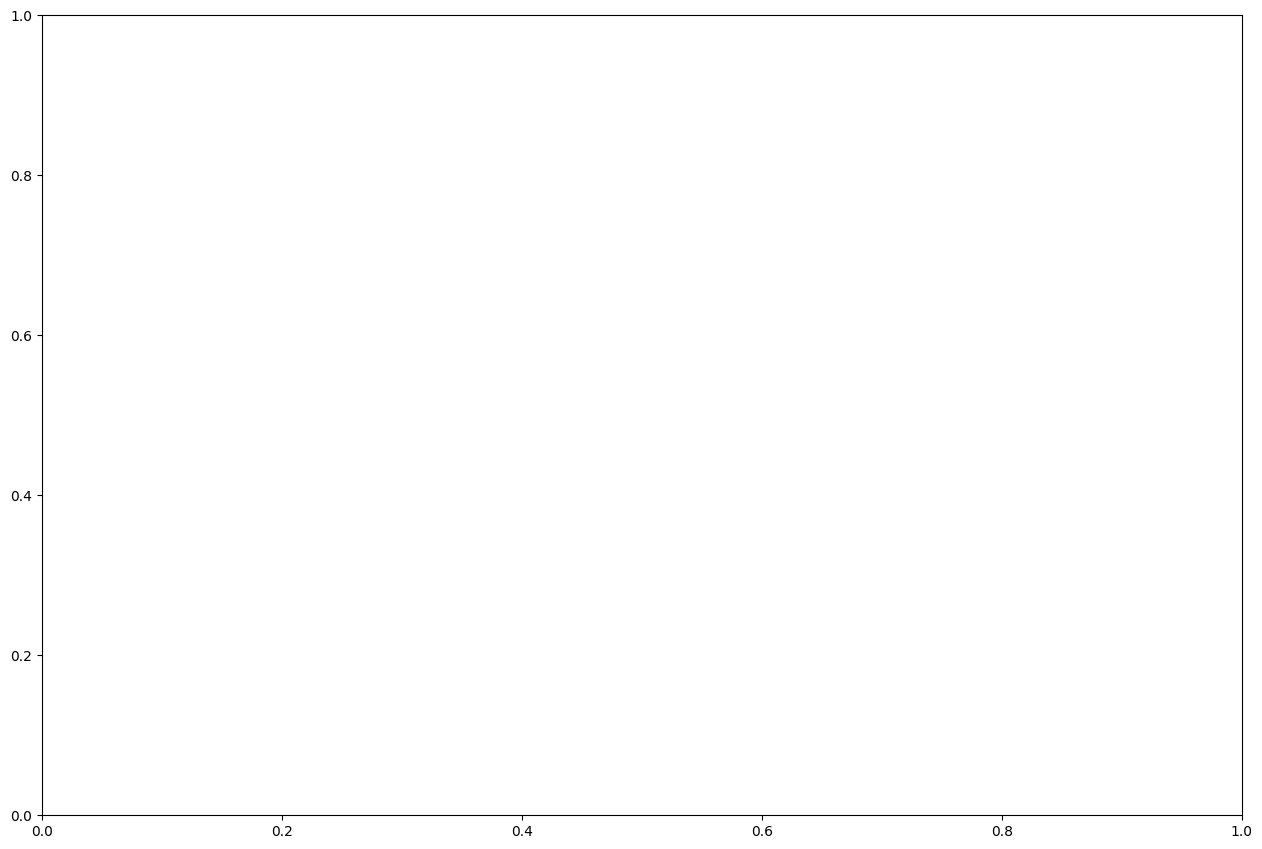

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Cargar los dos primeros cuadernos del archivo .xls (modifica la ruta si es necesario)
file_path = directory_in + 'iMH805_775_regnetwork.xls'
sheet1 = pd.read_excel(file_path, sheet_name=0)
sheet2 = pd.read_excel(file_path, sheet_name=1)

# Seleccionar las primeras 4 columnas de ambos cuadernos con los nombres correctos
columns_sheet1 = ['Target TF', 'Regulator TF', 'Regulator signal', 'Act/Rep']
columns_sheet2 = ['Target', 'Regulator TF', 'Regulator signal', 'Act/Rep']

df1 = sheet1[columns_sheet1]
df2 = sheet2[columns_sheet2]

# Renombrar las columnas del segundo cuaderno para que coincidan con las del primero
df2 = df2.rename(columns={'Target': 'Target TF'})

# Combinar los dos cuadernos en un solo DataFrame
df_filtered = pd.concat([df1, df2], ignore_index=True)

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir los nodos y las aristas basadas en el DataFrame
for index, row in df_filtered.iterrows():
    regulator = row['Regulator TF']
    target = row['Target TF']
    signal = row['Regulator signal']
    act_rep = row['Act/Rep']

    # Añadir los nodos y clasificarlos según su tipo
    if pd.notna(target) and target not in df_filtered['Regulator TF'].values:
        G.add_node(target, node_type='target', color='orange')
    if pd.notna(regulator):
        G.add_node(regulator, node_type='TF', color='green')
    if pd.notna(signal):
        G.add_node(signal, node_type='signal', color='purple')

    # Verificar si los valores no son NA antes de añadir la arista
    if pd.notna(regulator) and pd.notna(target) and pd.notna(act_rep):
        # Añadir la arista
        G.add_edge(regulator, target)

    if pd.notna(signal) and pd.notna(act_rep):
        G.add_edge(signal, target)

# Calcular el grado de entrada y salida
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Calcular la conectividad (suma de grados de entrada y salida)
connectivity = {node: in_degrees[node] + out_degrees[node] for node in G.nodes()}

# Normalizar los valores de conectividad para usarlos como colores y tamaños
norm = Normalize(vmin=min(connectivity.values()), vmax=max(connectivity.values()))
cmap = plt.get_cmap('coolwarm')

# Asignar colores a las aristas según la conectividad
edge_colors = [cmap(norm(connectivity[edge[0]] + connectivity[edge[1]])) for edge in G.edges()]

# Asignar tamaño a los nodos según su conectividad (escala)
node_sizes = [100 + 1000 * (connectivity[node] - min(connectivity.values())) / (max(connectivity.values()) - min(connectivity.values())) for node in G.nodes()]

# Asignar colores a los nodos según su conectividad
node_colors = [cmap(norm(connectivity[node])) for node in G.nodes()]

# Dibujar el grafo con los colores de las aristas y tamaños de los nodos
plt.figure(figsize=(12, 8))
#pos = nx.spring_layout(G) #pa tener las mismas posiciones del principio
nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_size=node_sizes, node_color=node_colors, font_size=8)

# Crear una barra de color para la leyenda
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # solo necesario para que funcione la barra de color
cbar = plt.colorbar(sm)
cbar.set_label('Conectividad (Grados de entrada + Salida)')

plt.title('Mapa de Calor de Conectividad')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función compleja
def complex_function(z):
    return np.sin(1 / z) + z**2 * np.exp(1j * z)

# Crear la cuadrícula en el plano complejo
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Calcular la función compleja sobre la cuadrícula
W = complex_function(Z)

# Magnitud (para la forma de la superficie) y fase (para el color)
magnitude = np.abs(W)
phase = np.angle(W)

# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalizar la fase para que esté en el rango [0, 1]
norm_phase = (phase + np.pi) / (2 * np.pi)

# Crear los colores basados en la fase
colors = plt.cm.hsv(norm_phase)

# Crear la superficie con colores según la fase
ax.plot_surface(X, Y, magnitude, facecolors=colors, rstride=1, cstride=1, antialiased=False, shade=False)

# Añadir una barra de color para la fase
m = plt.cm.ScalarMappable(cmap='hsv')
m.set_array(phase)
plt.colorbar(m, shrink=0.5, aspect=5, label='Fase de la función compleja')

# Configuraciones adicionales para la visualización
ax.set_title("Superficie de una Función Compleja", fontsize=15)
ax.set_xlabel("Re(z)", fontsize=12)
ax.set_ylabel("Im(z)", fontsize=12)
ax.set_zlabel("|f(z)|", fontsize=12)
ax.view_init(elev=60, azim=60)  # Cambia la vista para apreciar mejor el caos de la superficie

plt.show()